In [1]:
%load_ext autoreload
%autoreload 2
import os
from pathlib import Path

print(Path().cwd())
os.chdir(Path().cwd().parent)
print(Path().cwd())

c:\0_Main\2_Quantitative_ultrasound\2_github\PyQuantUS\pyquantus\utc\plugins\attenuation_estimation\CFS_method
c:\0_Main\2_Quantitative_ultrasound\2_github\PyQuantUS\pyquantus\utc\plugins\attenuation_estimation


2025-06-06 13:14:36,896 - INFO - Version 12.0.1-673 is valid.
2025-06-06 13:14:36,897 - INFO - Reading raw RF file: d:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28t07-20-59+0000_rf.raw
2025-06-06 13:14:36,899 - INFO - Opened file successfully.
2025-06-06 13:14:36,899 - INFO - Parsed header: {'id': 2, 'frames': 34, 'lines': 192, 'samples': 2928, 'samplesize': 2}
2025-06-06 13:14:37,123 - INFO - Successfully read 34 RF frames.
2025-06-06 13:14:37,125 - INFO - Loaded 34 raw RF frames of size 192 x 2928 (lines x samples)
2025-06-06 13:14:37,126 - INFO - Final data stored for 61804357200: [{'depth': 7.5, 'dB': 5.0}, {'depth': 22.5, 'dB': 13.04}, {'depth': 37.5, 'dB': 24.62}, {'depth': 52.5, 'dB': 27.55}, {'depth': 67.5, 'dB': 31.17}, {'depth': 82.5, 'dB': 35.23}, {'depth': 97.5, 'dB': 35.62}, {'depth': 112.5, 'dB': 35.98}, {'depth': 127.5, 'dB': 36.74}, {'depth': 142.5, 'dB': 39.07}]
2025-06-06 13:14:37,126 - INFO - Final data stored for 61895766460: [{'dept

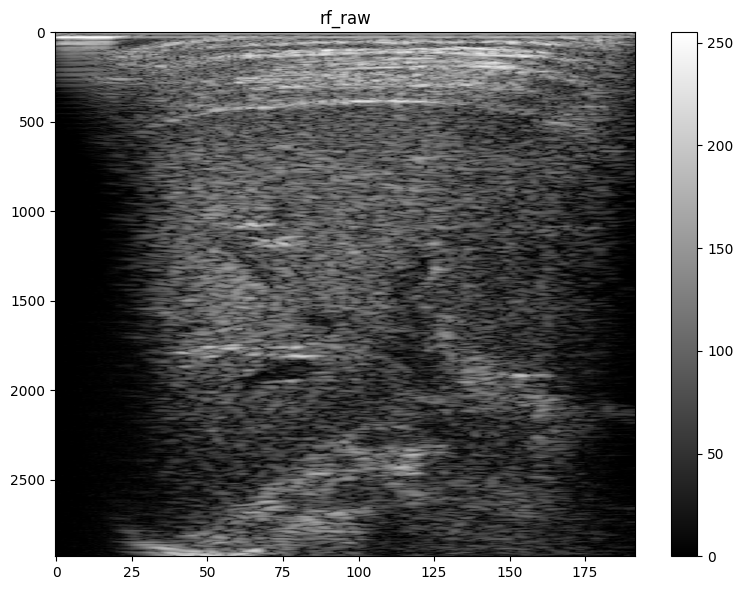

2025-06-06 13:15:56,280 - INFO - Plotting completed and displayed.
2025-06-06 13:15:56,291 - INFO - Starting the plot function.
2025-06-06 13:15:56,624 - INFO - Displayed 2D Signal Envelope.


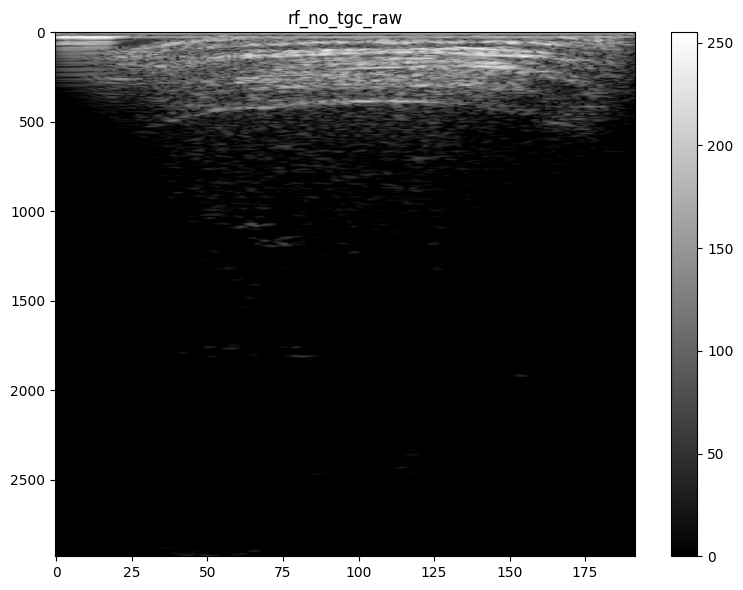

2025-06-06 13:15:56,960 - INFO - Plotting completed and displayed.


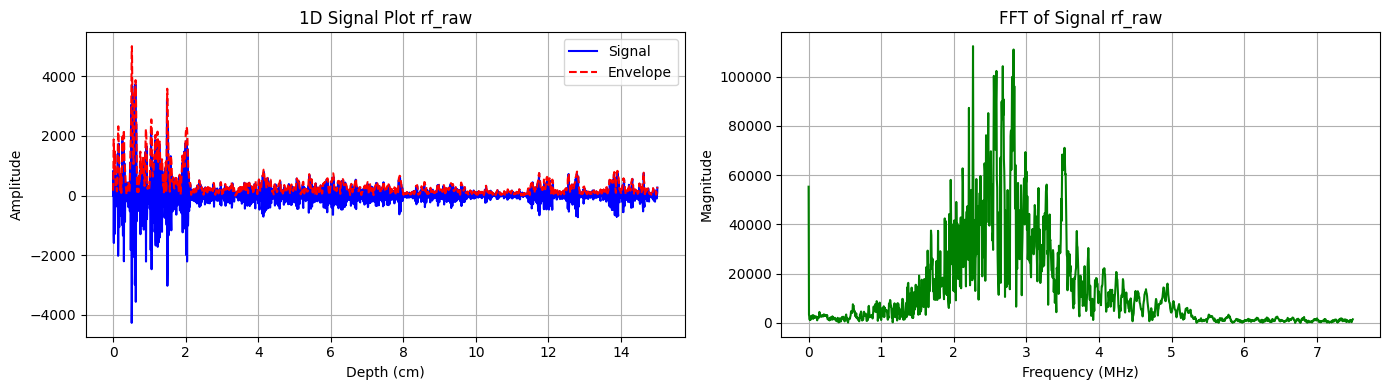

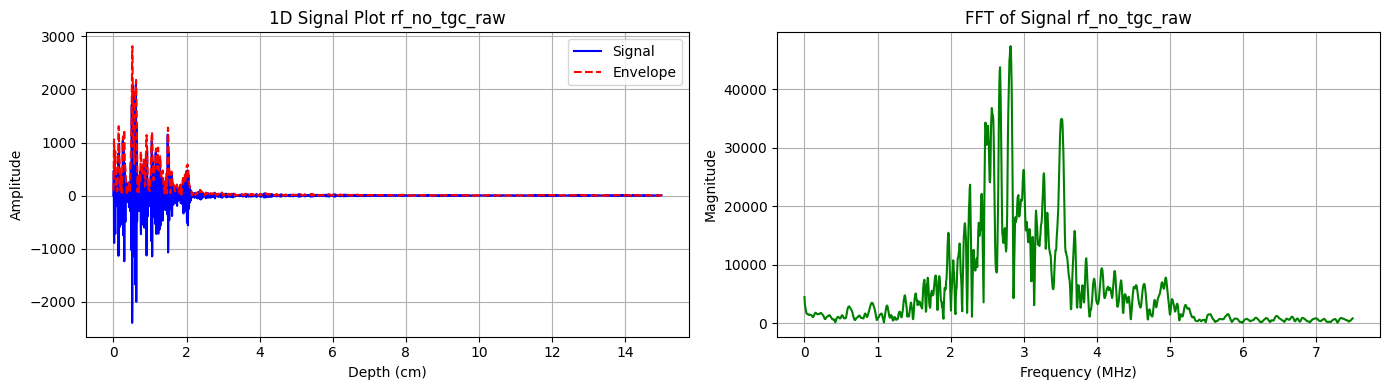

In [2]:
from pyquantus.parse.clarius import ClariusParser

rf_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28t07-20-59+0000_rf.raw'
rf_tgc_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28T07-20-59+0000_env.tgc.yml'
info_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28T07-20-59+0000_rf.yml'

data_obj = ClariusParser(rf_path, rf_tgc_path, info_path, visualize=True) # image = phantom for now

In [3]:
signal_nd = data_obj.rf_no_tgc_raw_data_3d
print(signal_nd.shape)

signal_1d = signal_nd[100, :, 0]

(192, 2928, 34)


In [4]:
from pyquantus.utc.plugins.utils import DepthTimeArrayGenerator

depth_time_obj = DepthTimeArrayGenerator(
    signal_len=len(signal_1d),
    sampling_frequency_MHz=30,
    speed_of_sound_m_s=1540,
)

print("depth_array: ", depth_time_obj.depth_array_cm)
print("time_array: ", depth_time_obj.time_array_s)

depth_array:  [0.00000000e+00 2.56666667e-03 5.13333333e-03 ... 7.50750000e+00
 7.51006667e+00 7.51263333e+00]
time_array:  [0.00000000e+00 3.33333333e-08 6.66666667e-08 ... 9.75000000e-05
 9.75333333e-05 9.75666667e-05]


2025-06-06 13:15:57,751 - INFO - Starting attenuation coefficient estimation run.
2025-06-06 13:15:57,753 - INFO - Computing STFT...
2025-06-06 13:15:57,757 - INFO - Calculating depth values...
2025-06-06 13:15:57,761 - INFO - Fitting Gaussians to each spectrum...
2025-06-06 13:15:57,843 - INFO - Fitting linear model to center frequencies...
2025-06-06 13:15:57,846 - INFO - Linear model fit complete. Raw estimated alpha: 0.033712
2025-06-06 13:15:57,846 - INFO - Visualizing STFT spectrogram...


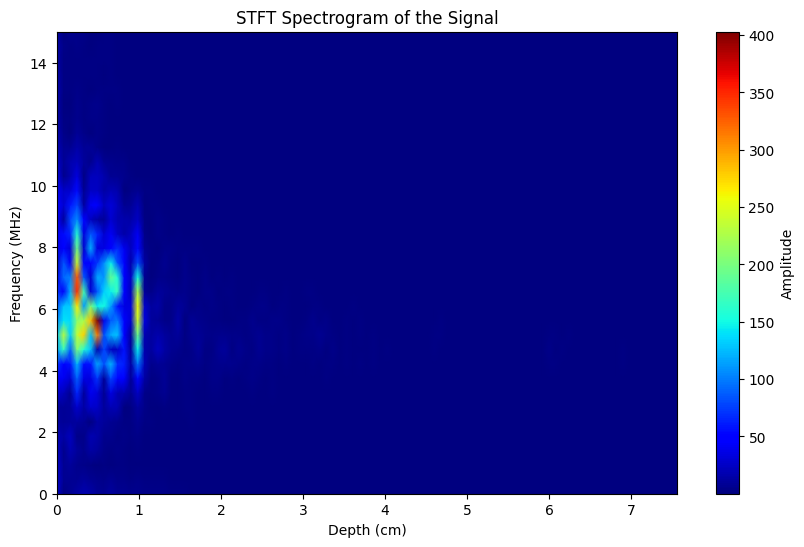

2025-06-06 13:15:58,045 - INFO - Visualizing linear fit to center frequencies...


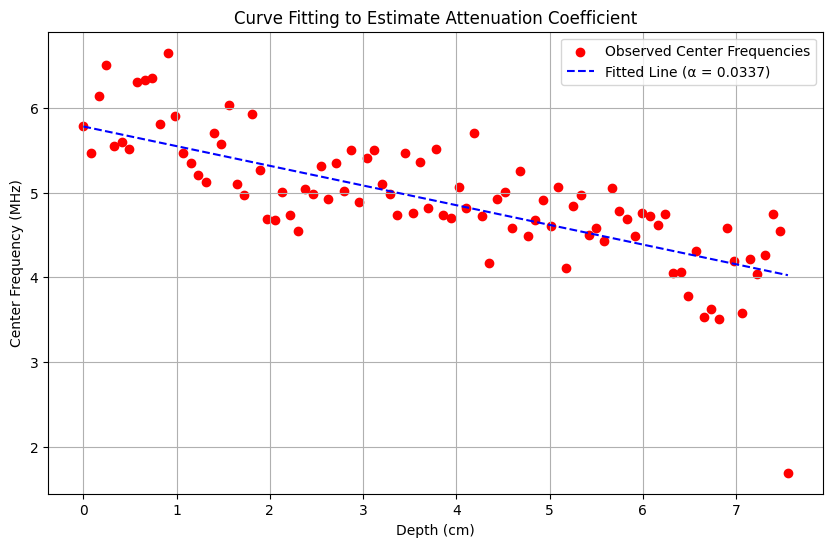

2025-06-06 13:15:58,180 - INFO - Visualizing signal segments and their spectra...


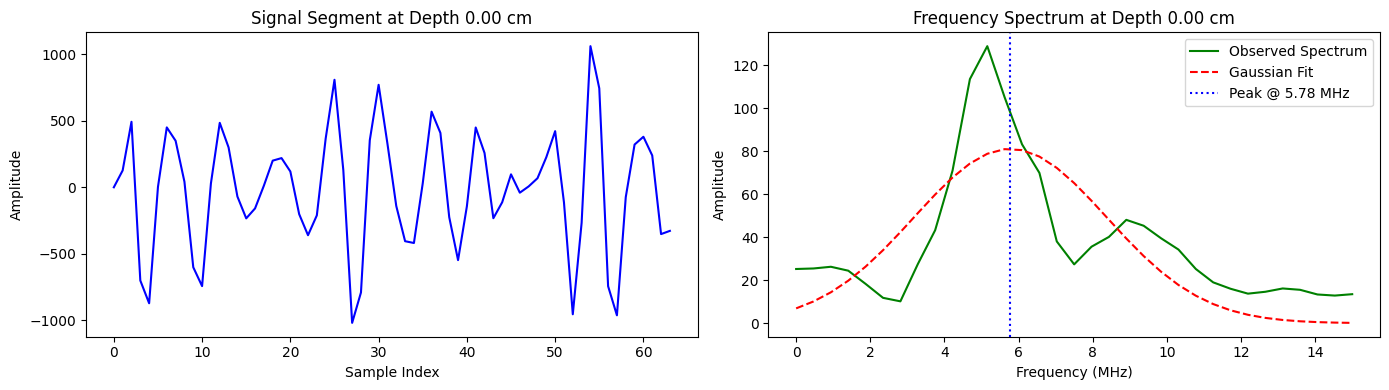

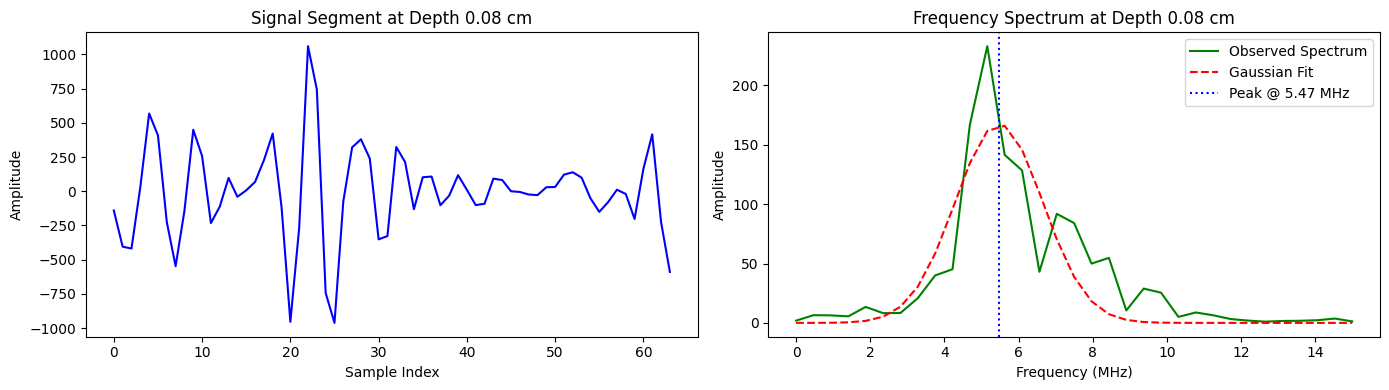

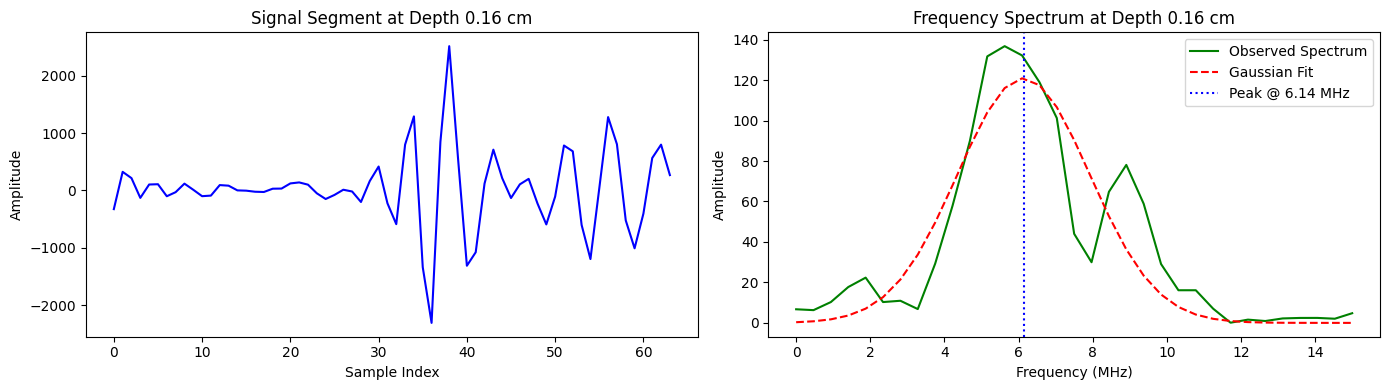

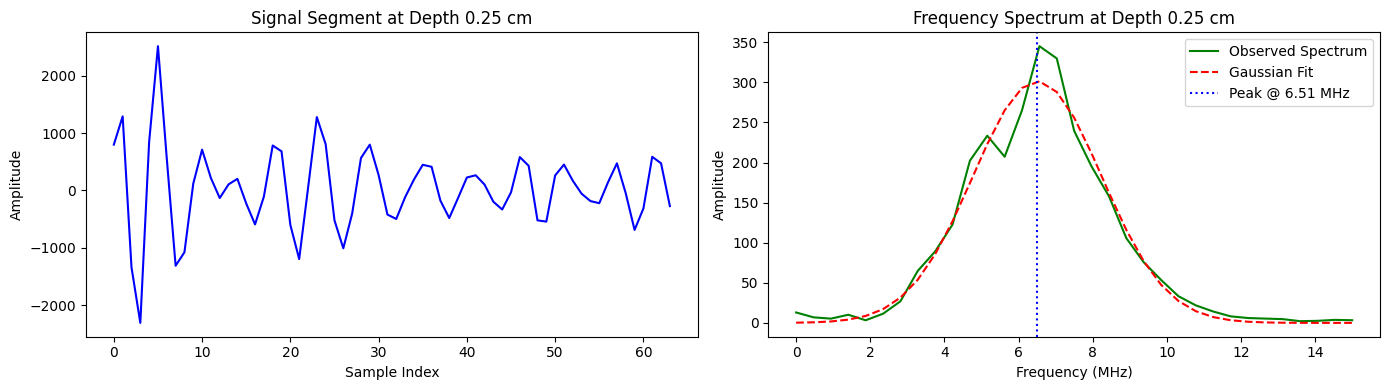

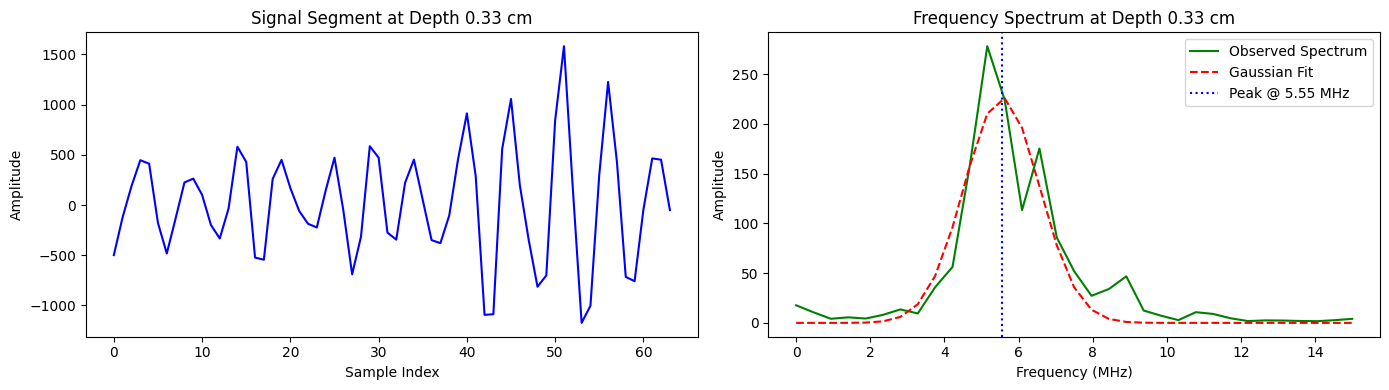

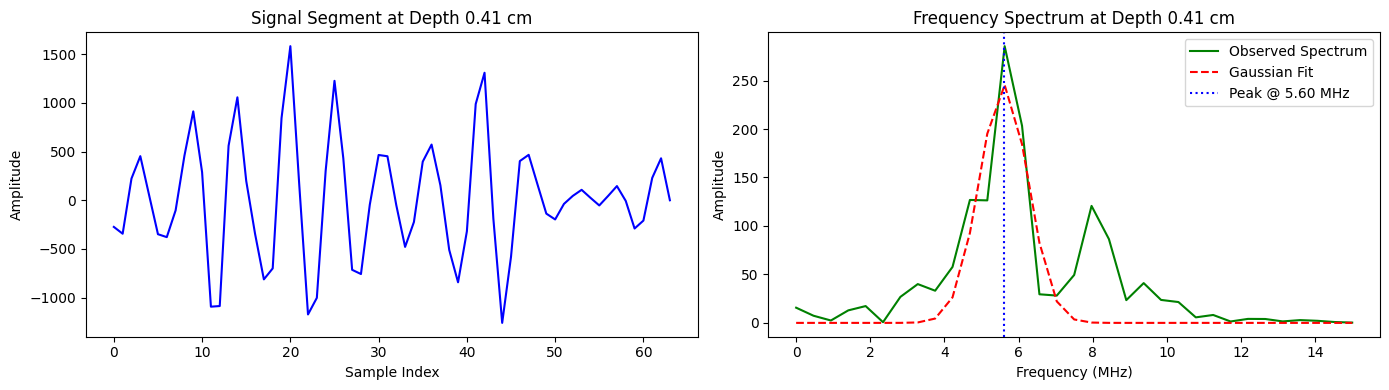

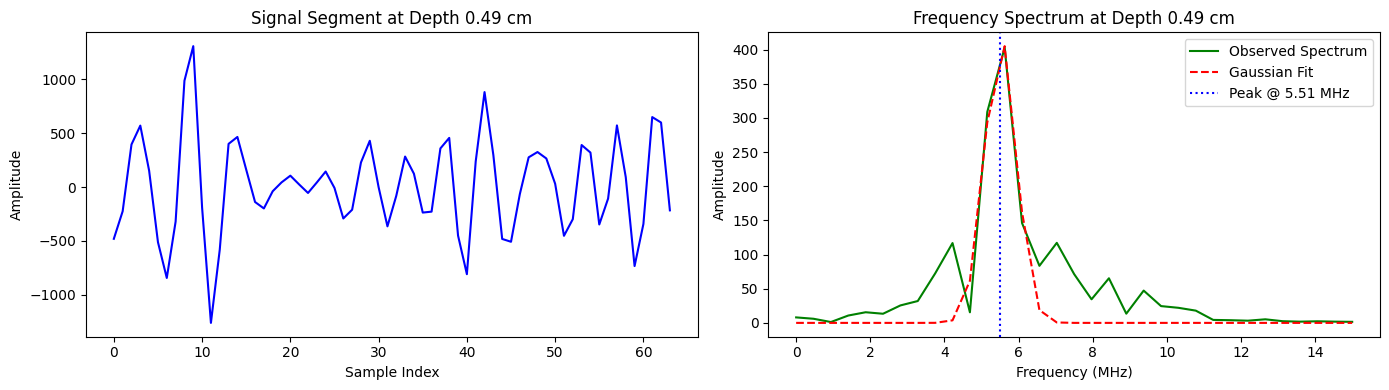

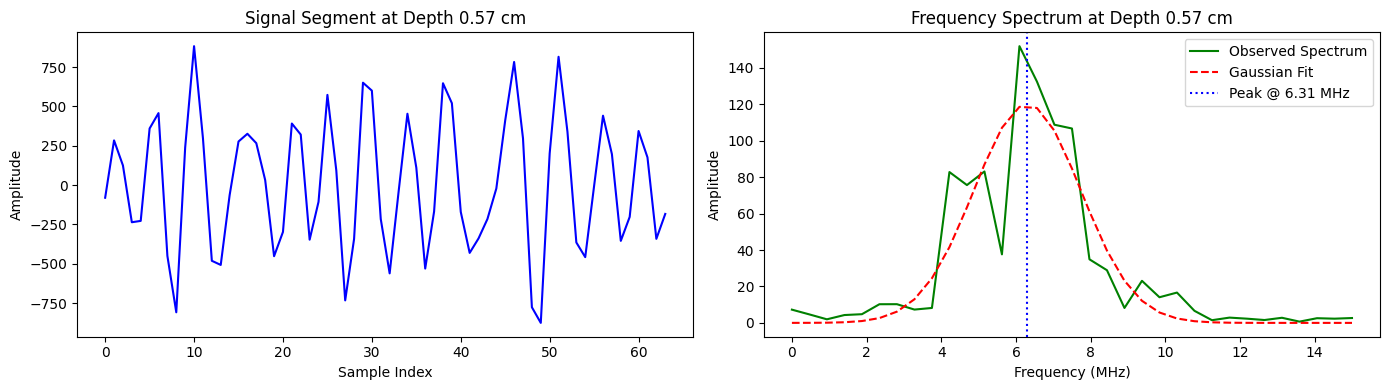

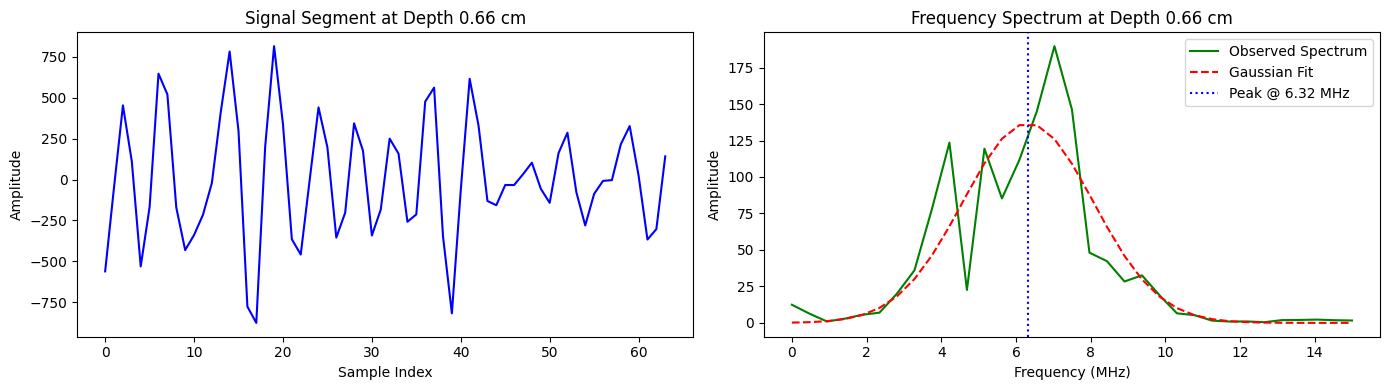

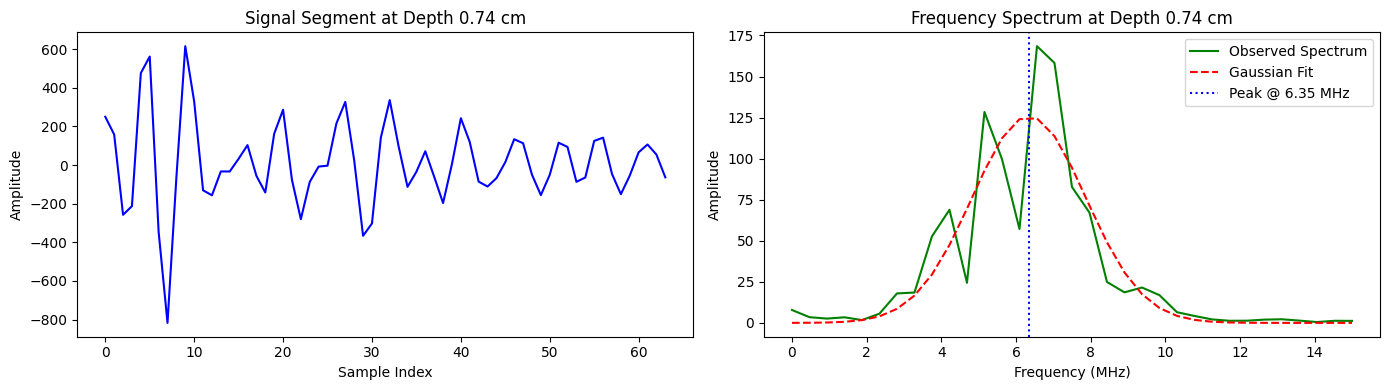

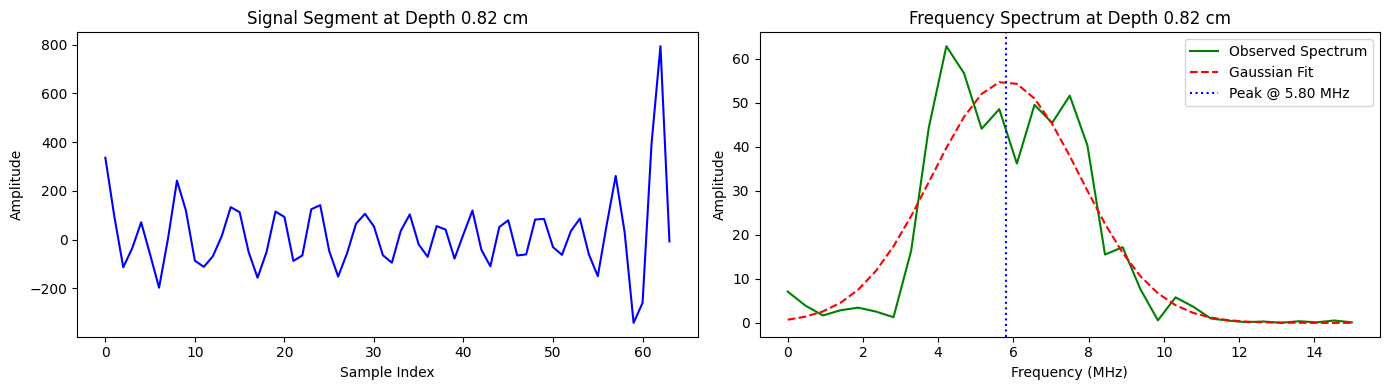

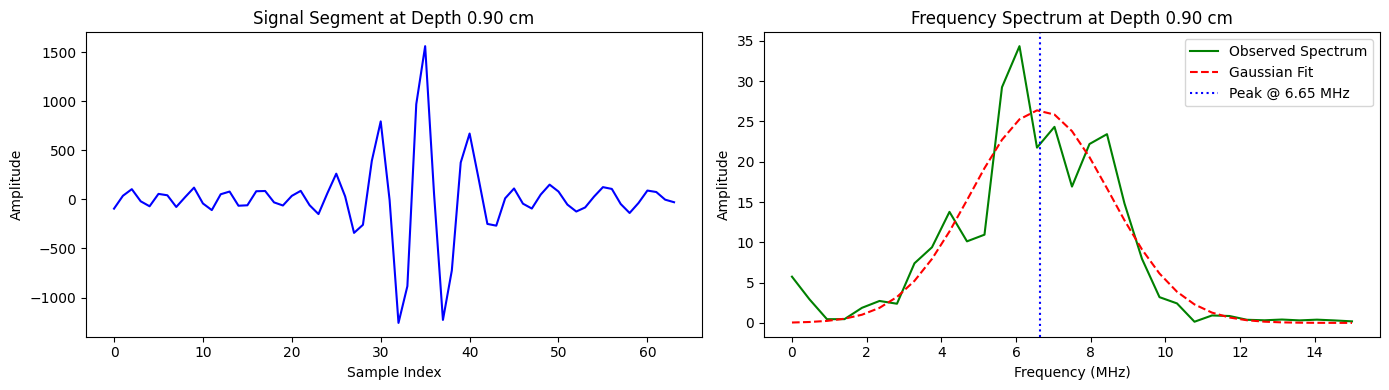

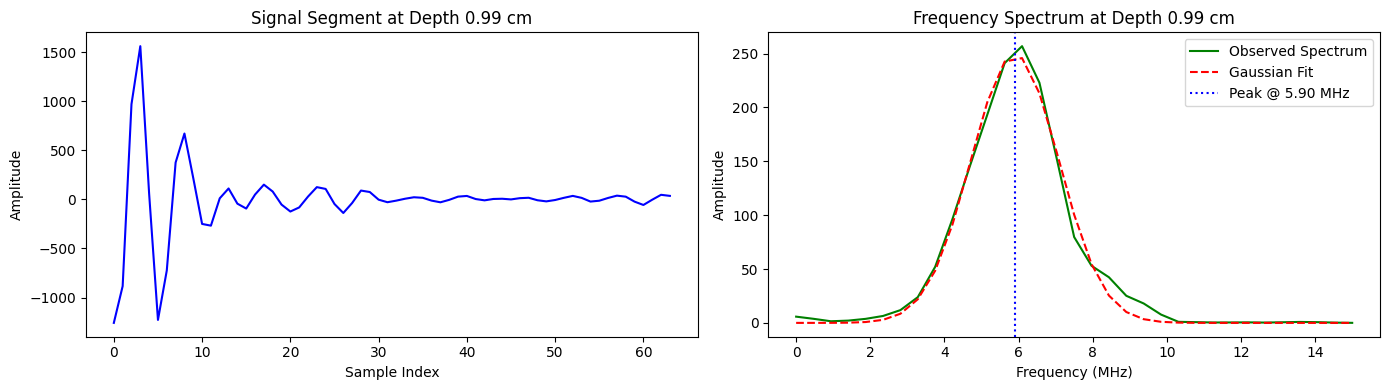

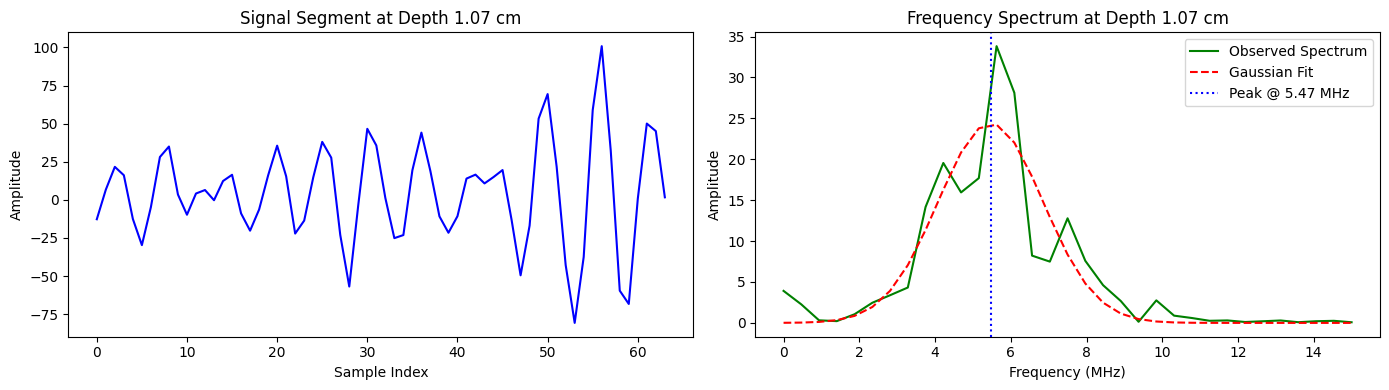

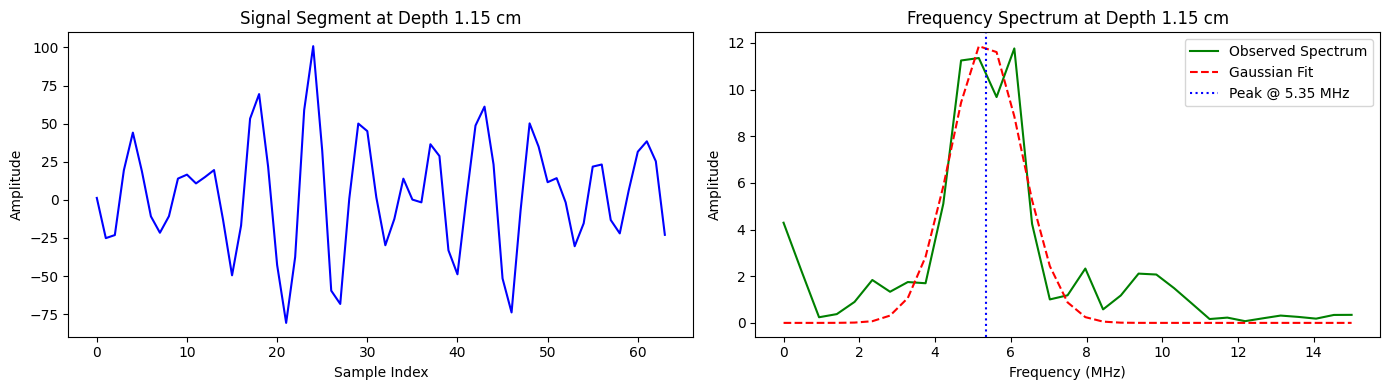

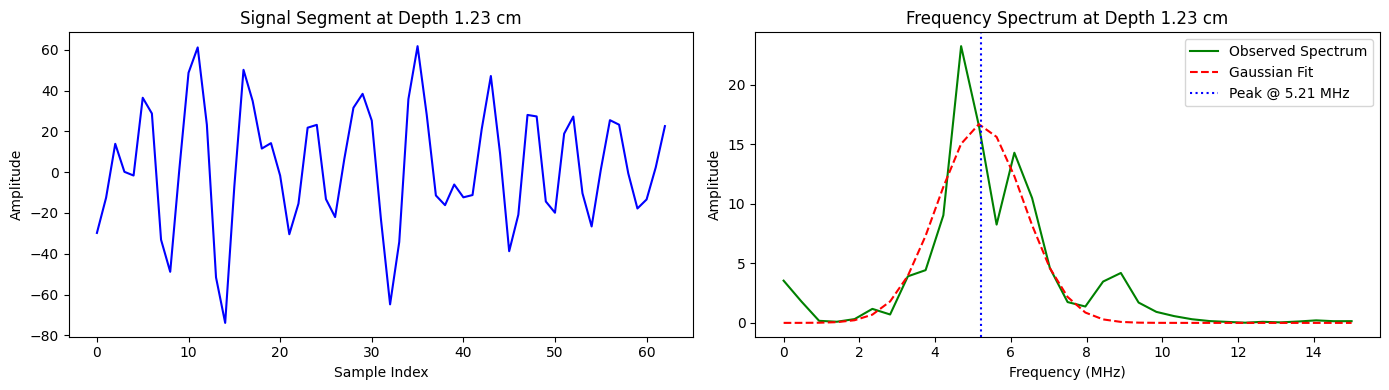

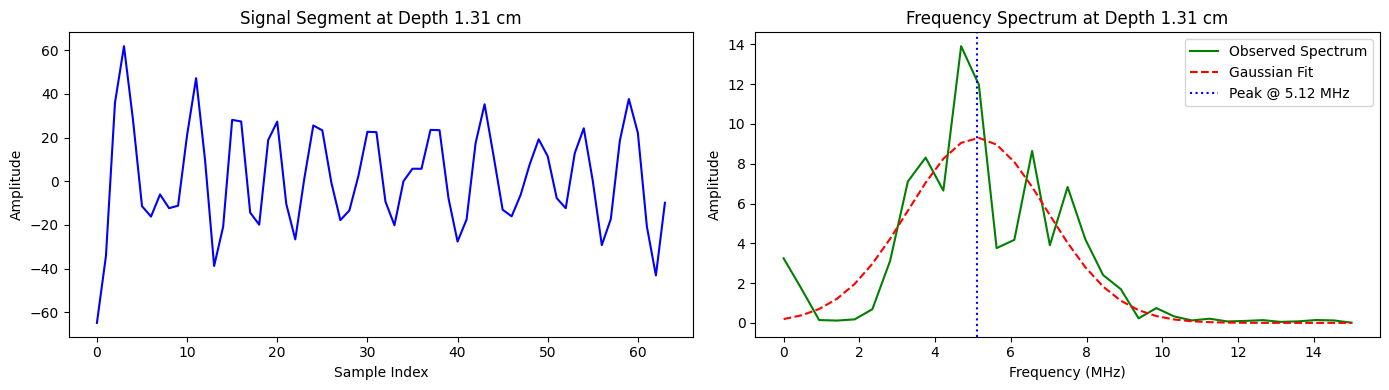

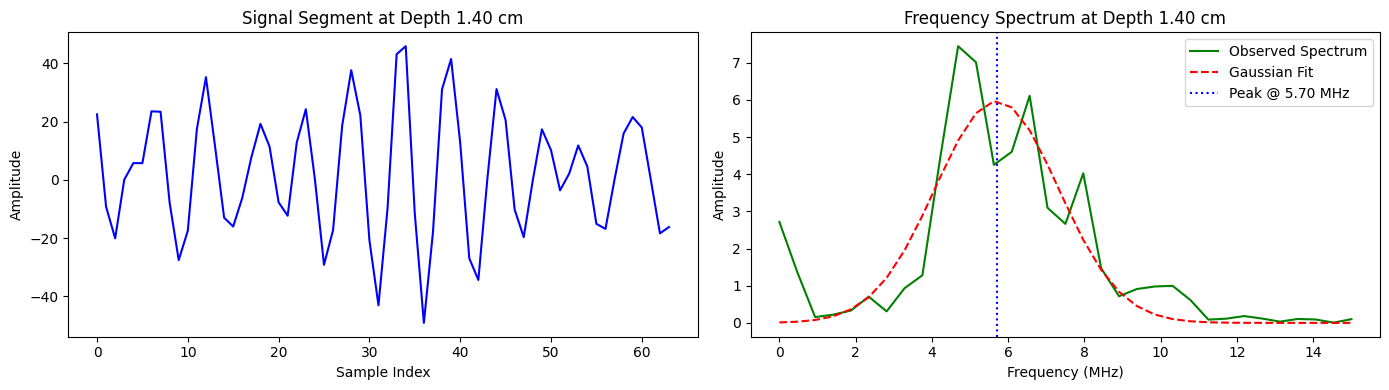

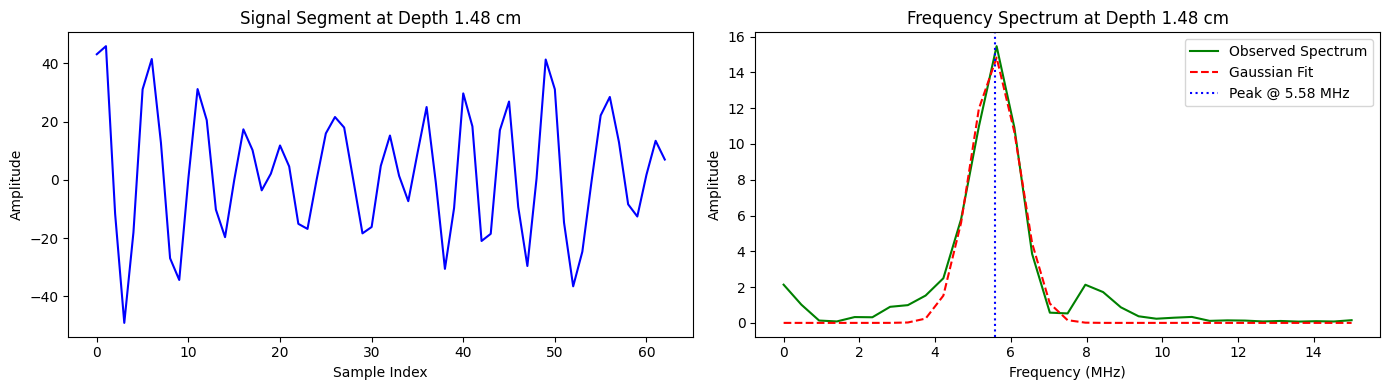

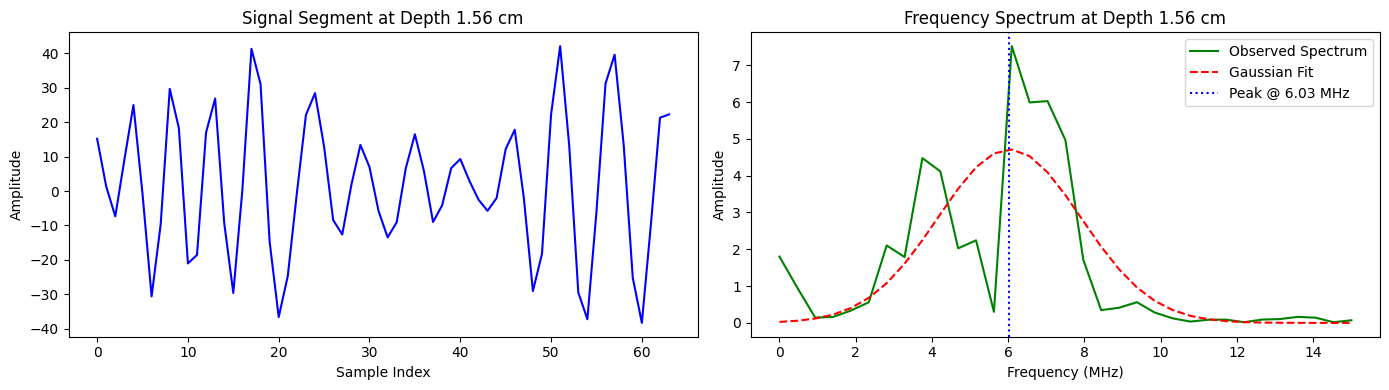

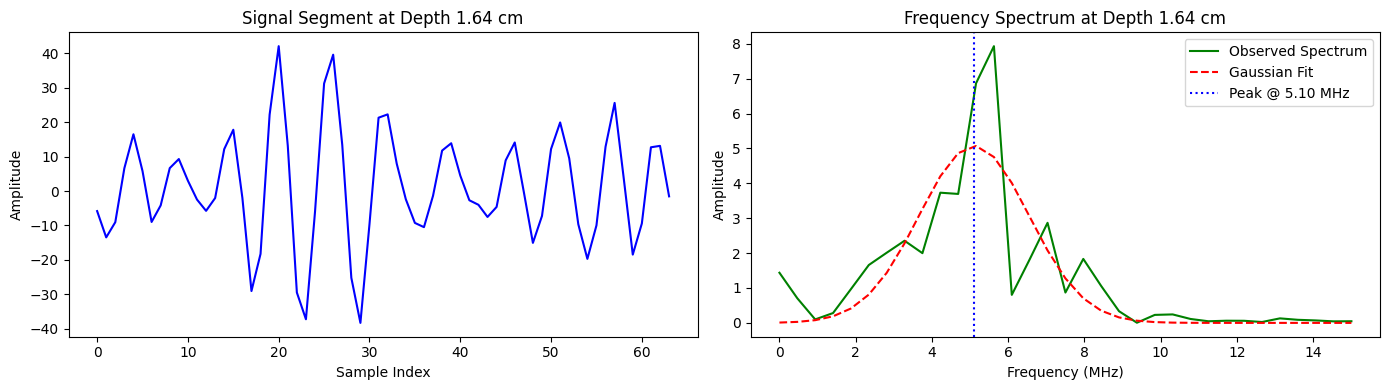

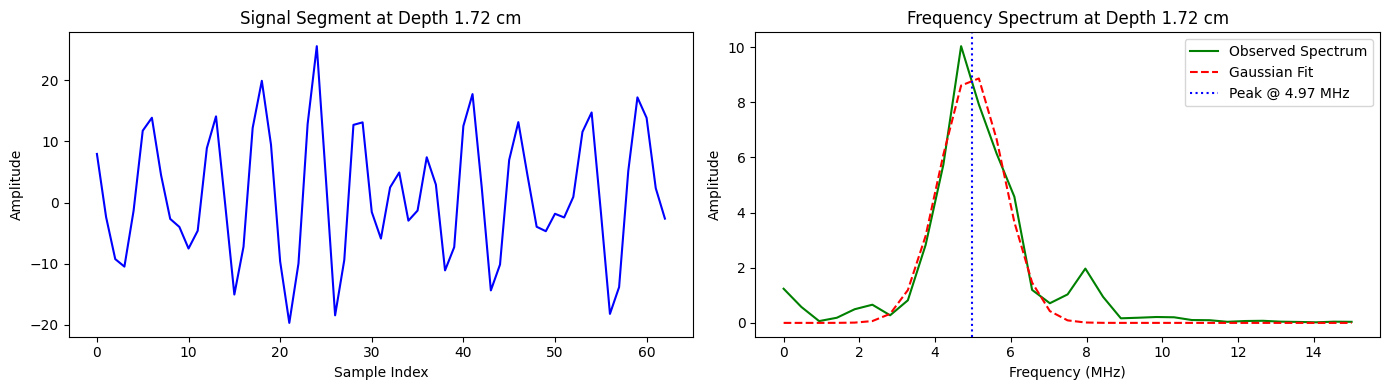

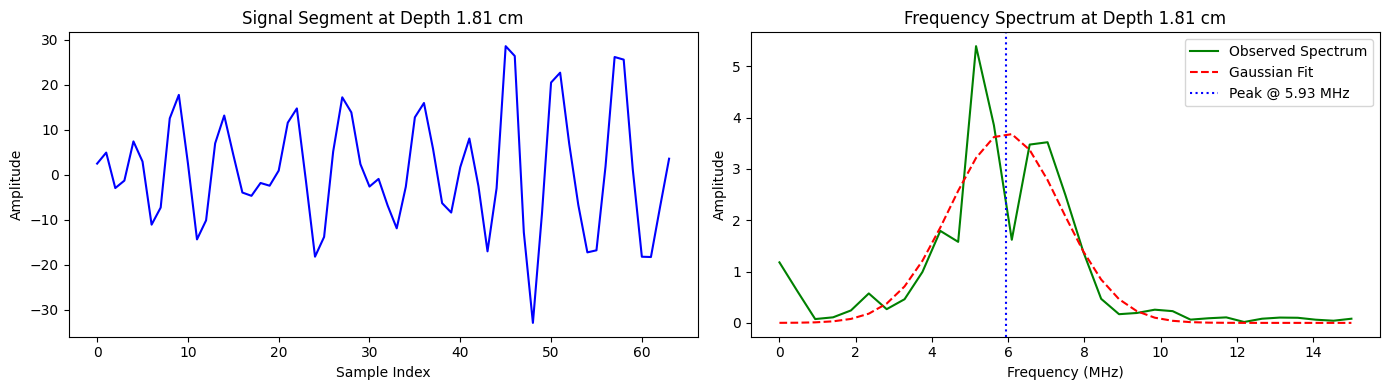

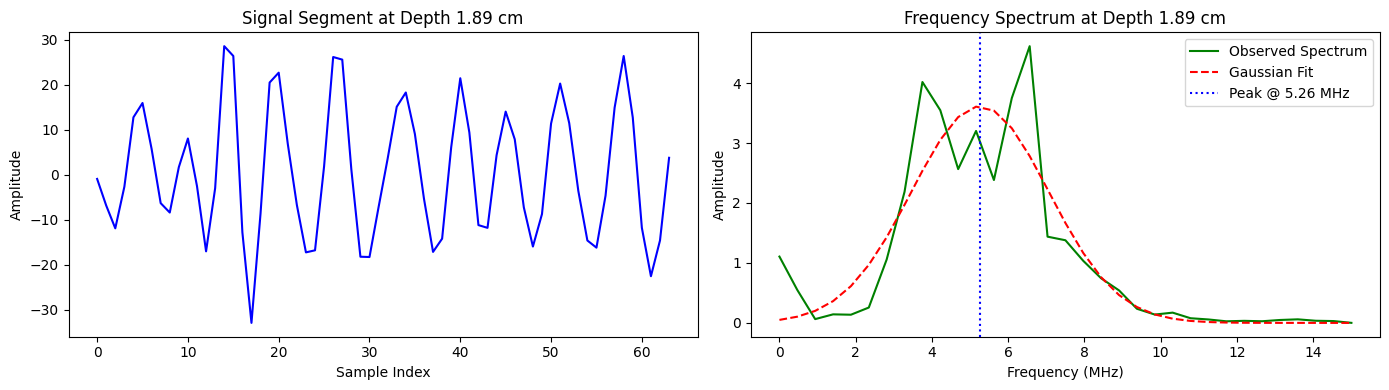

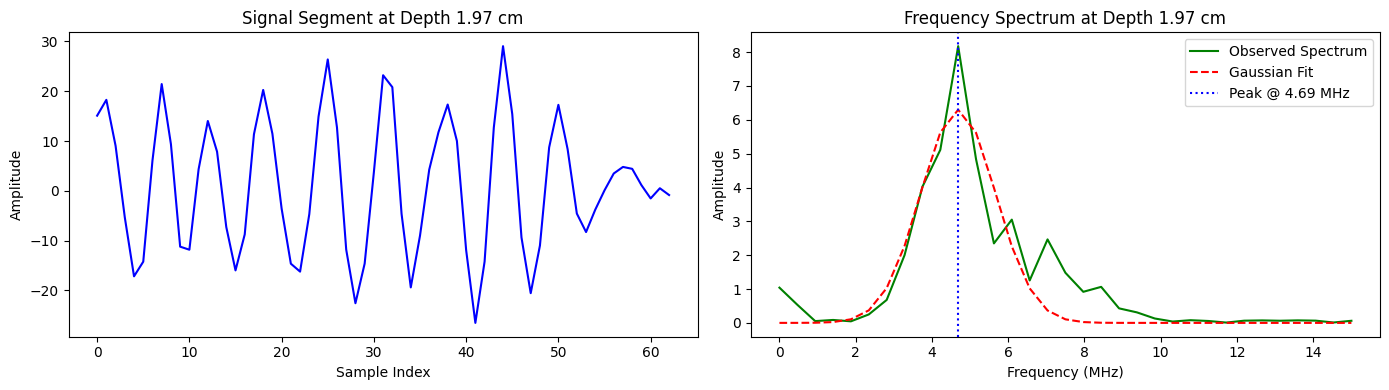

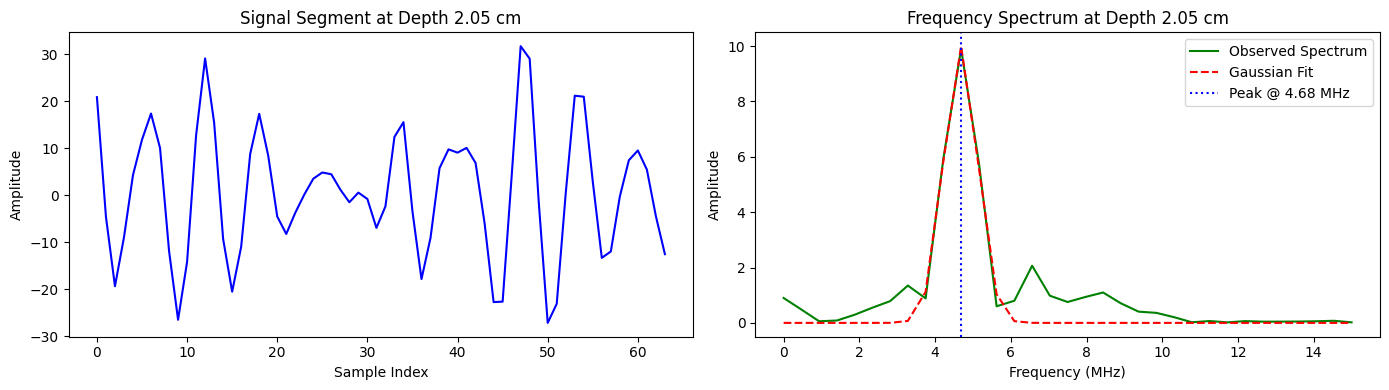

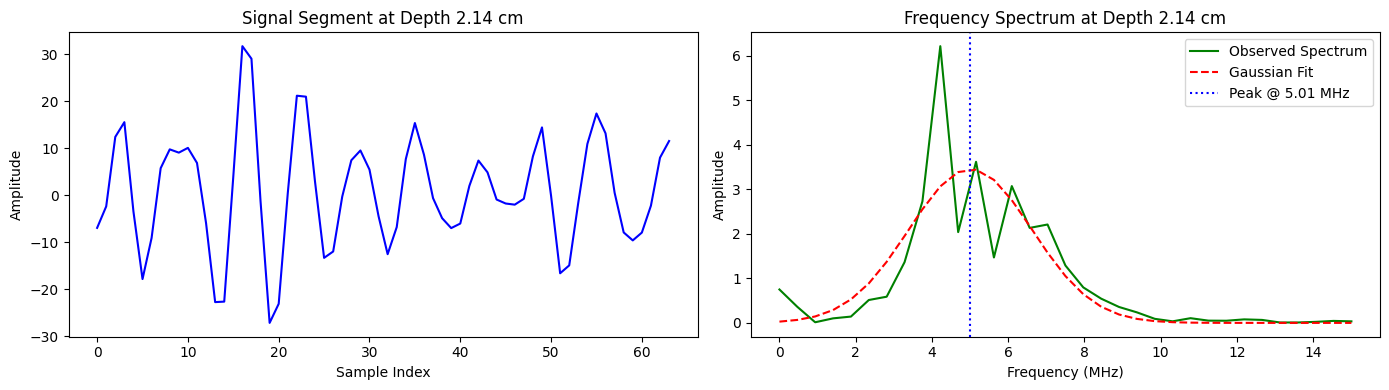

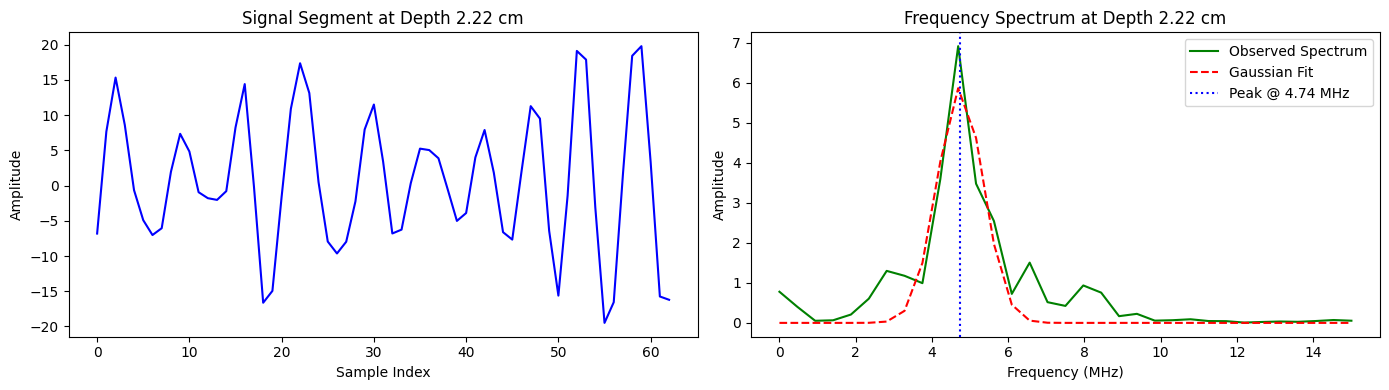

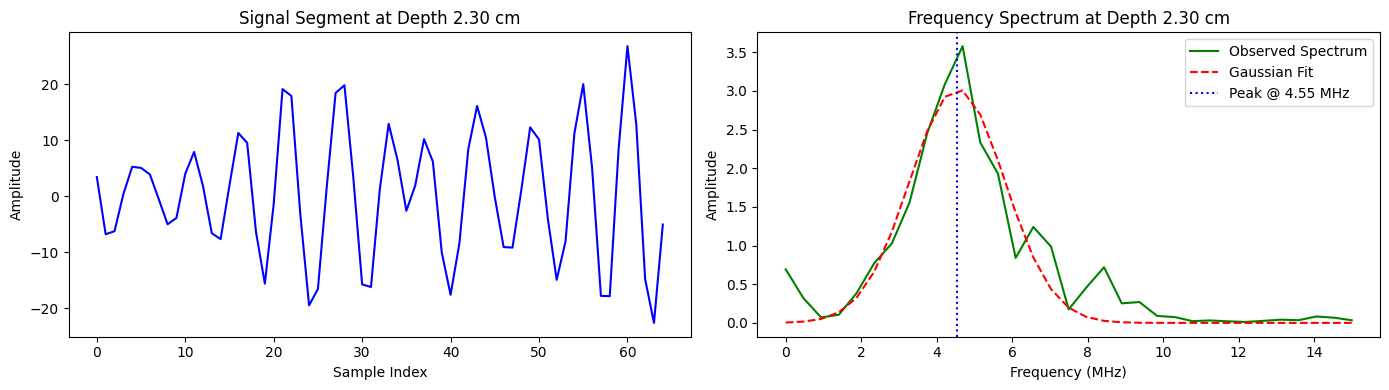

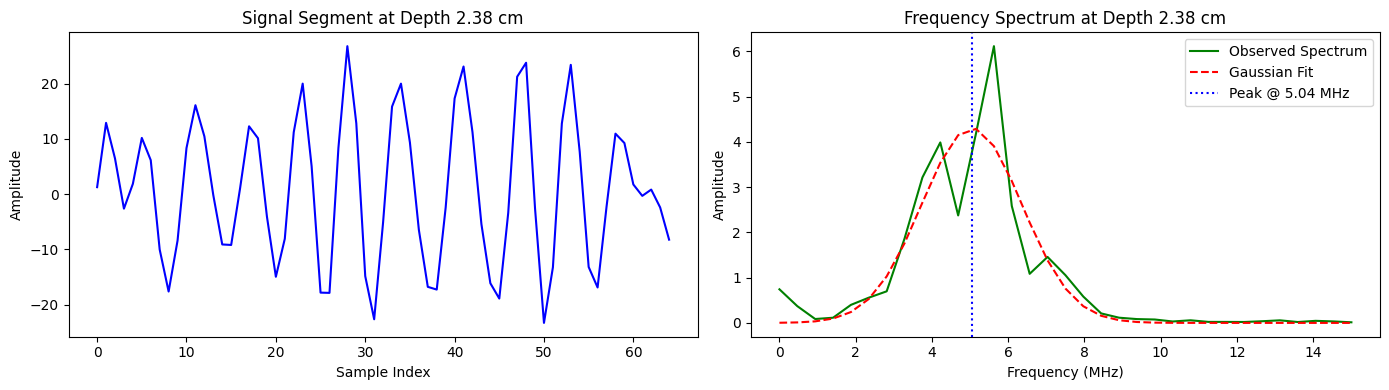

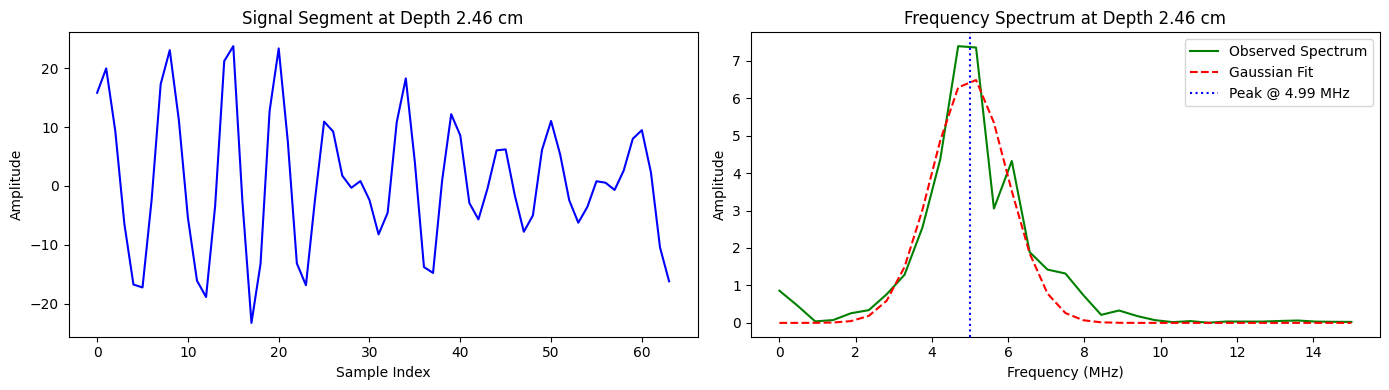

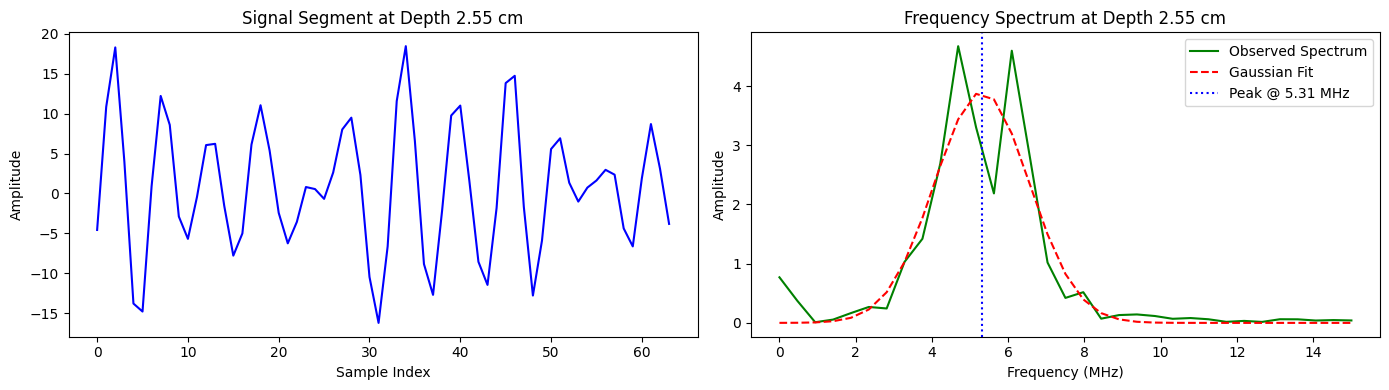

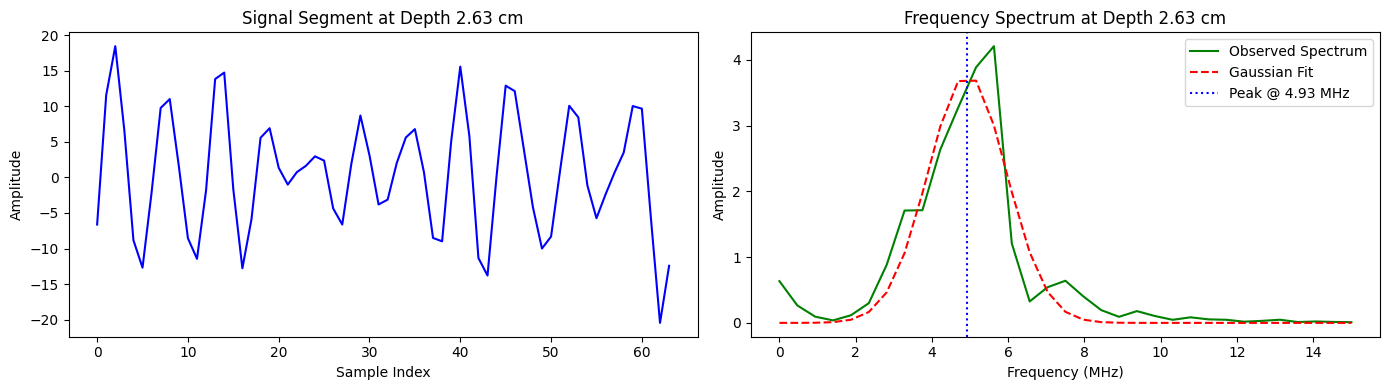

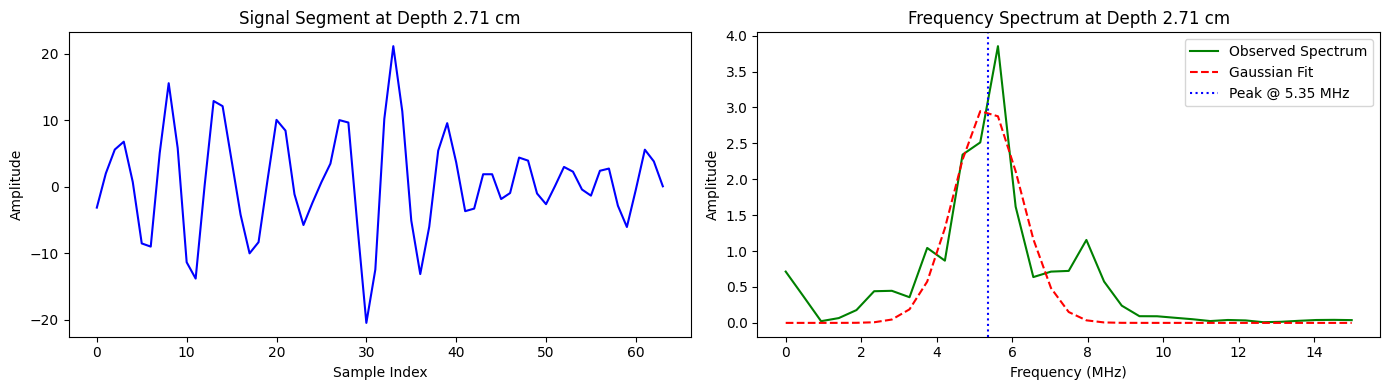

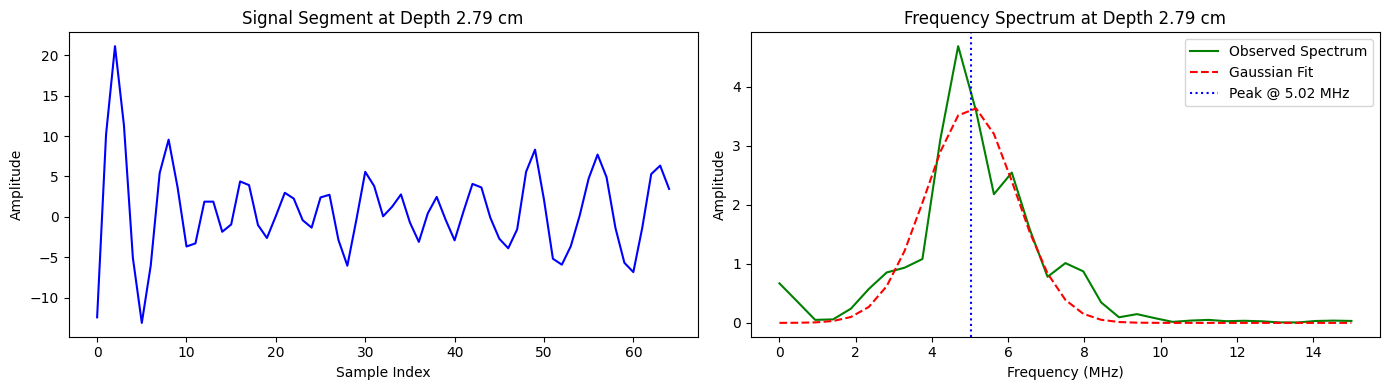

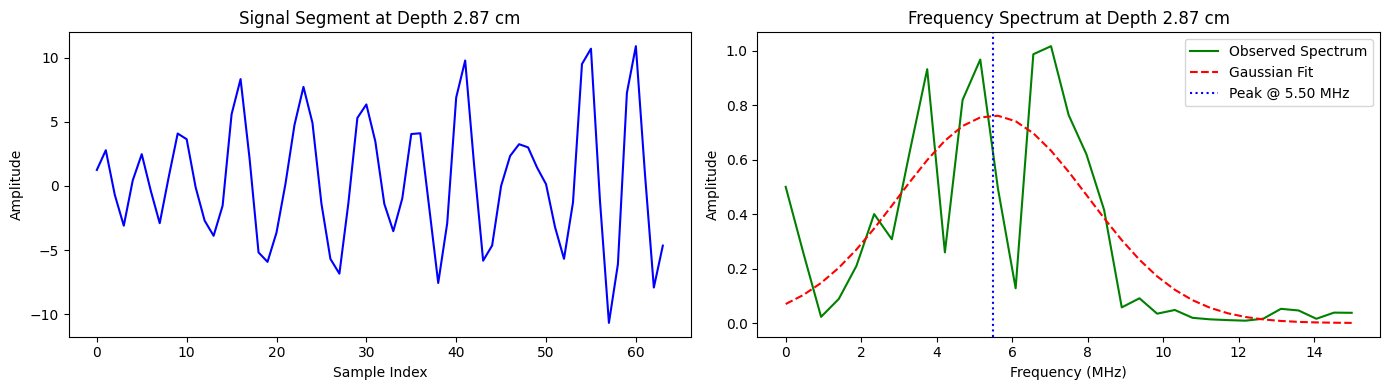

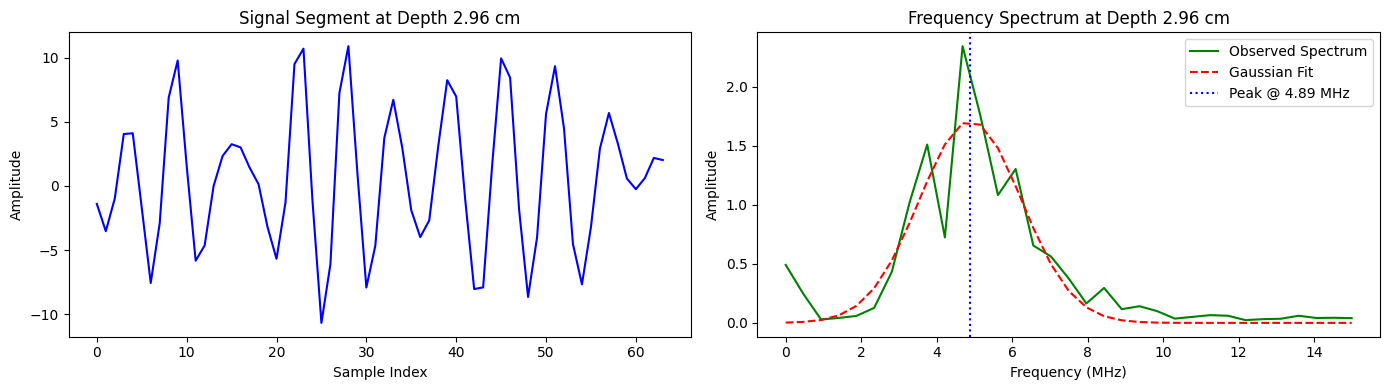

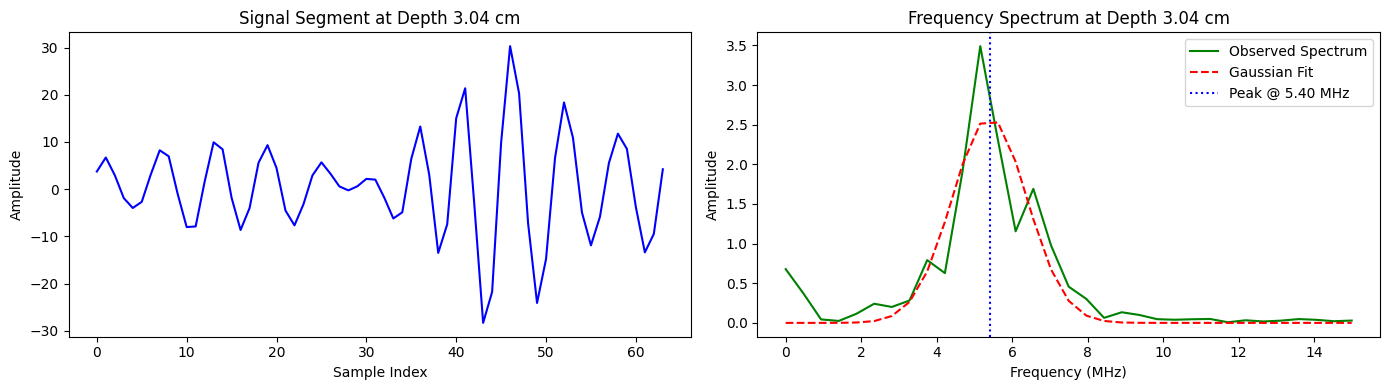

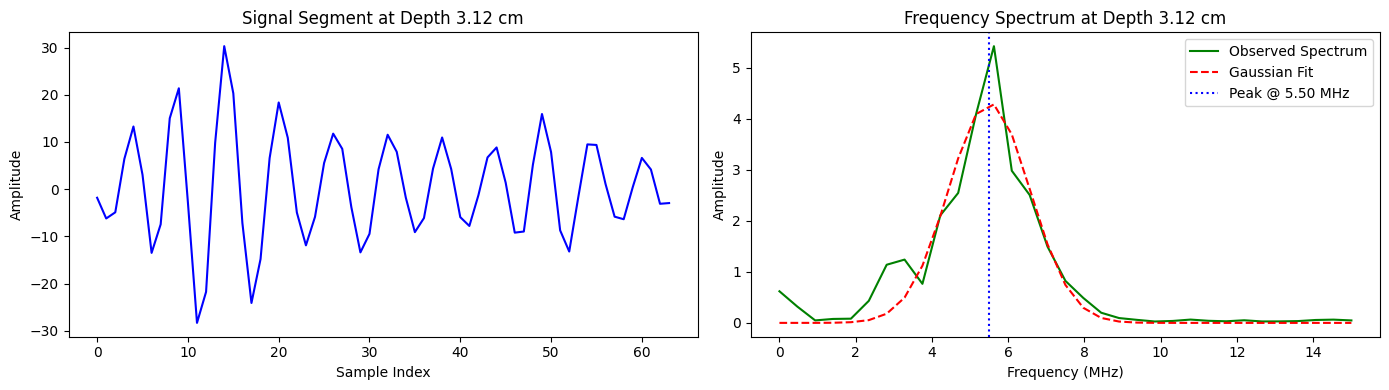

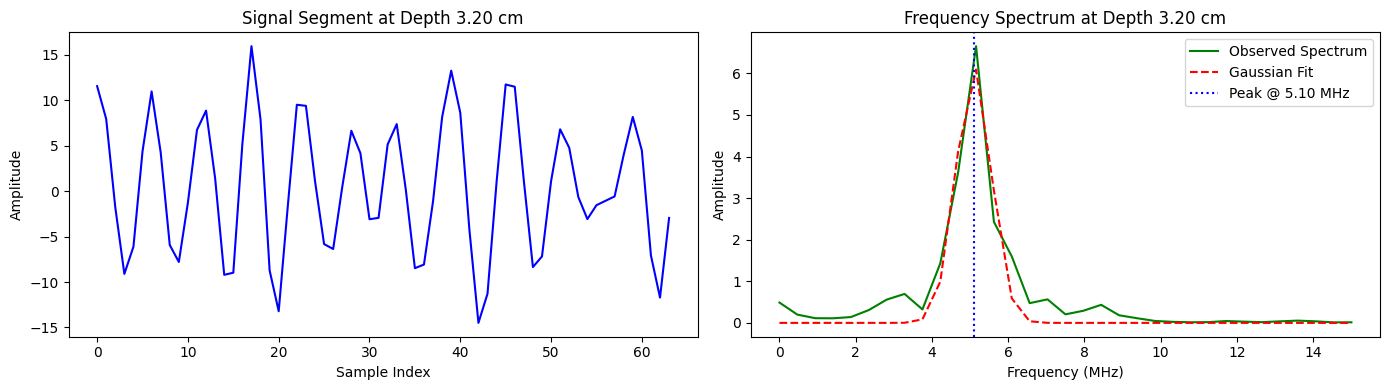

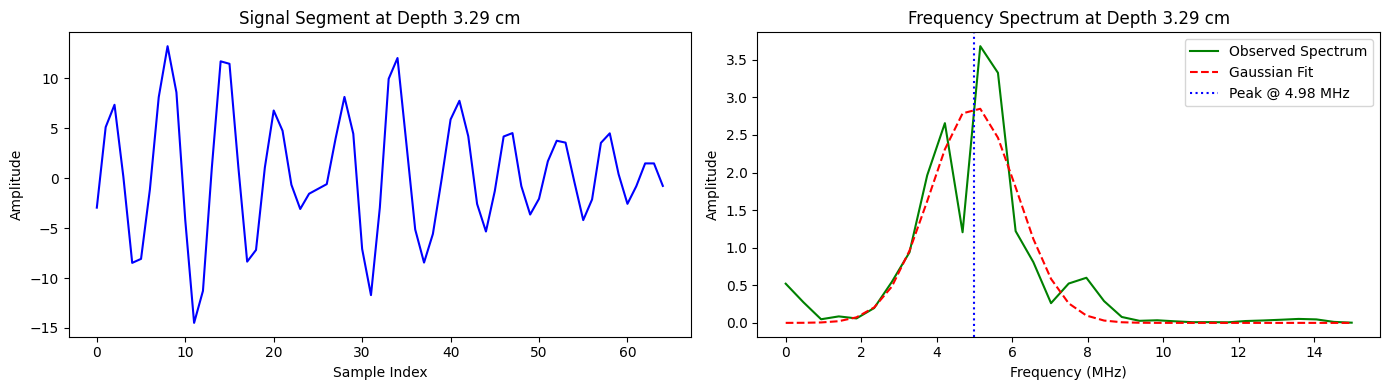

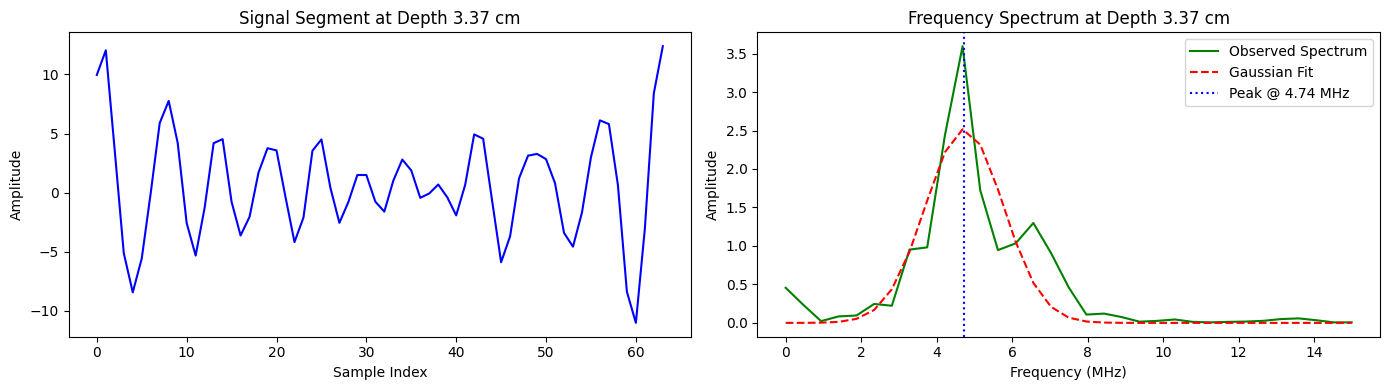

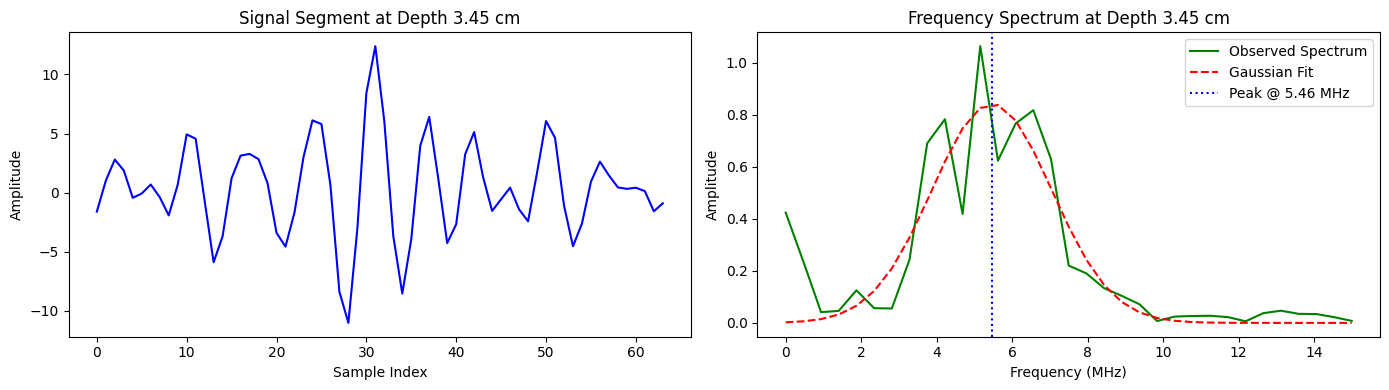

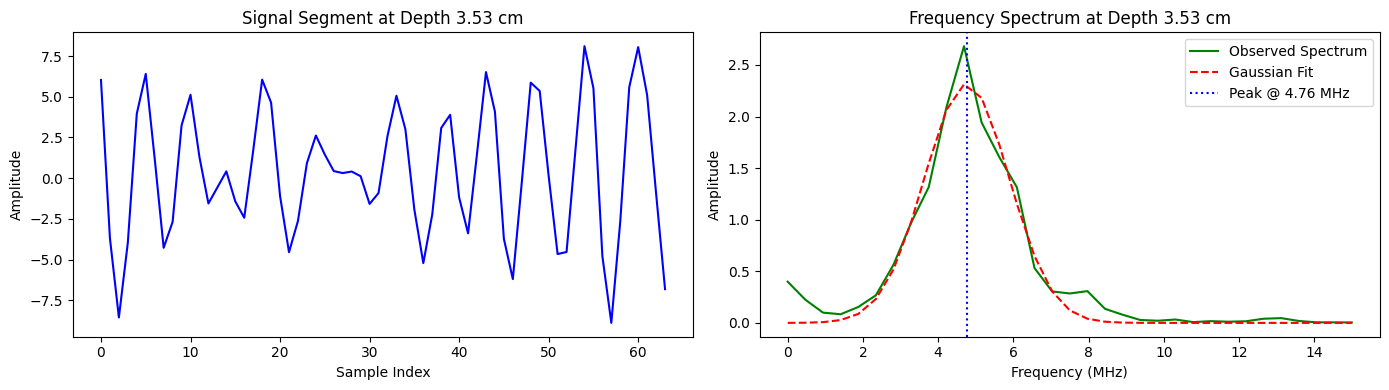

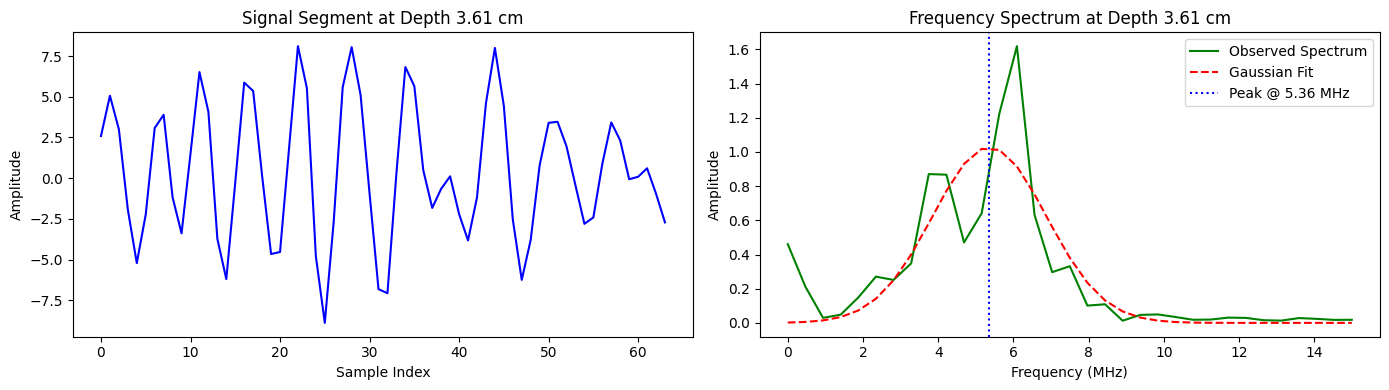

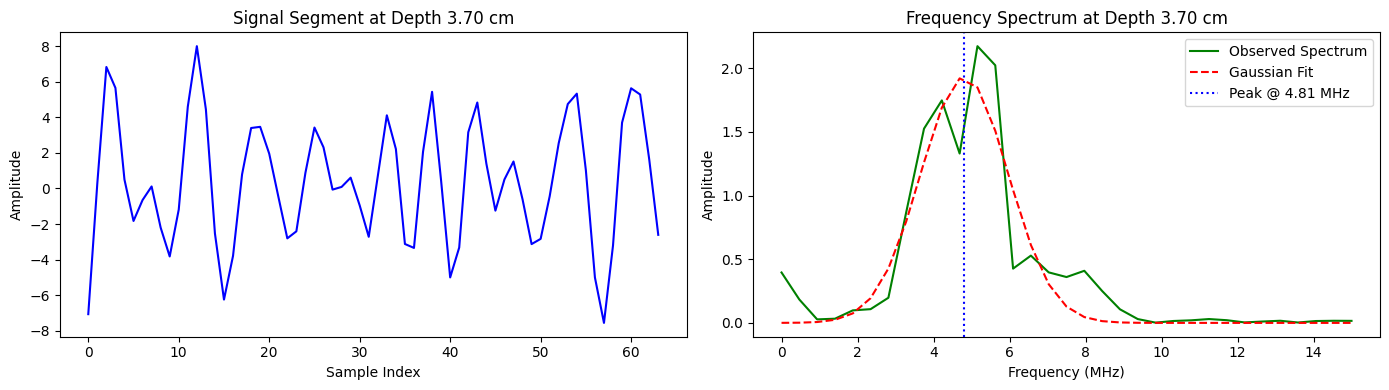

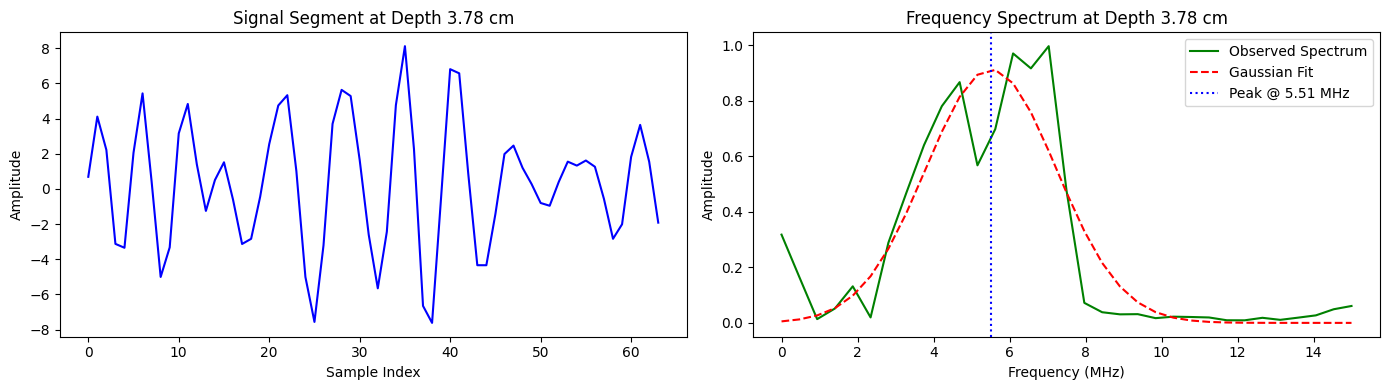

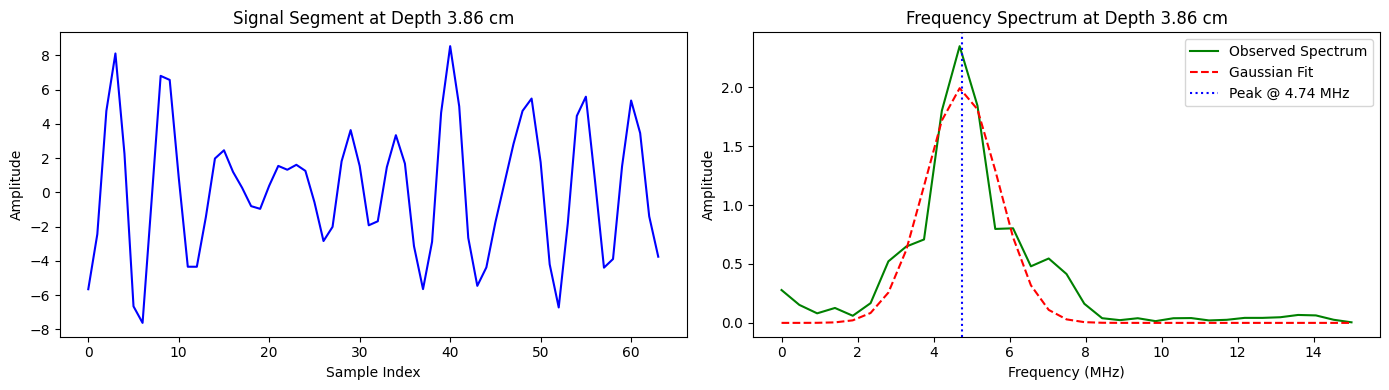

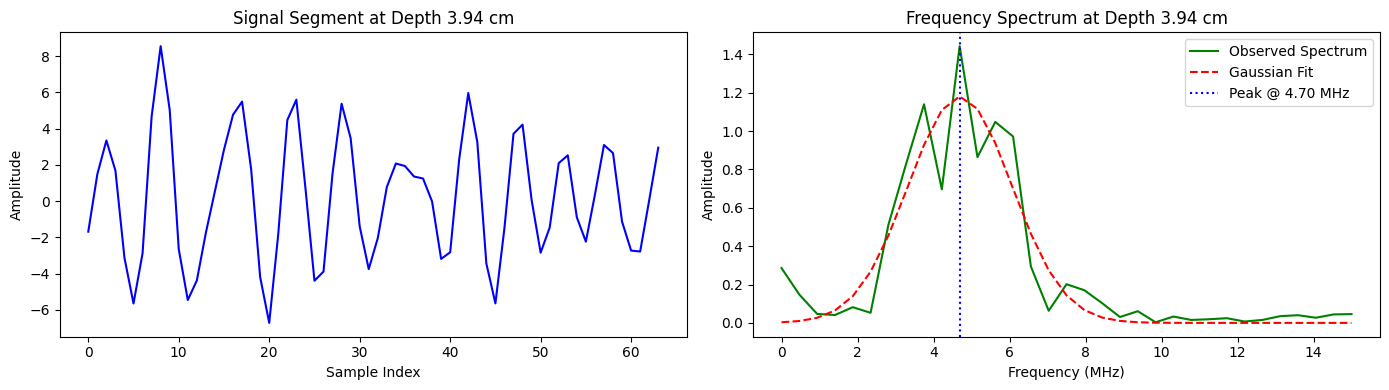

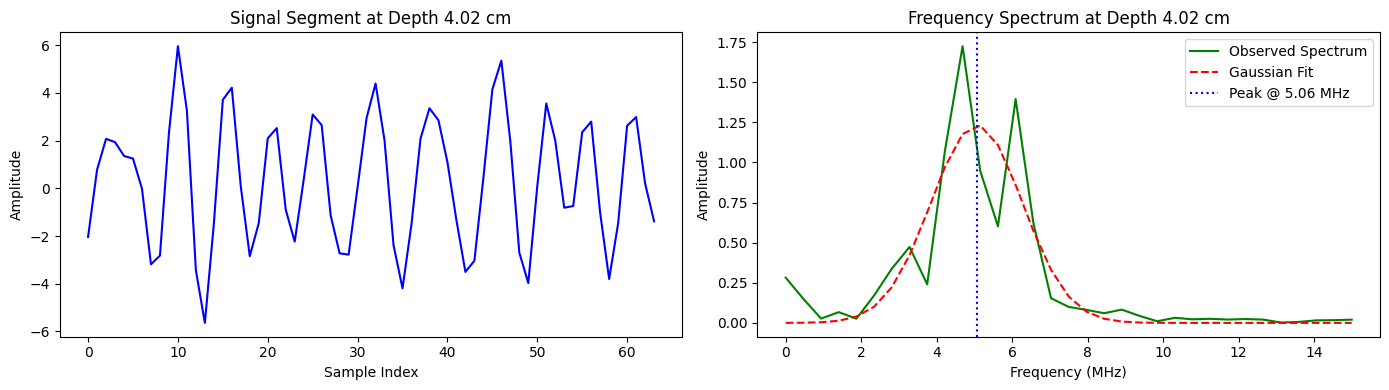

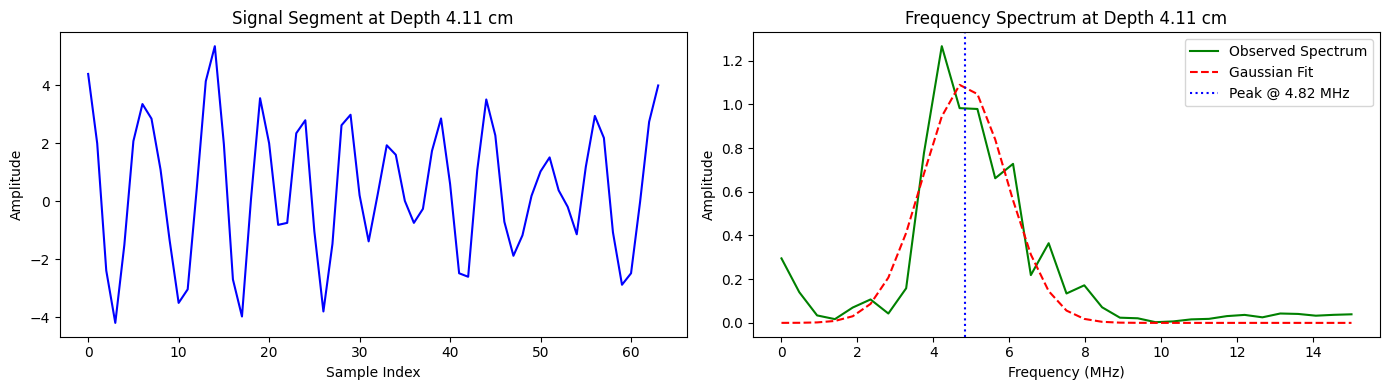

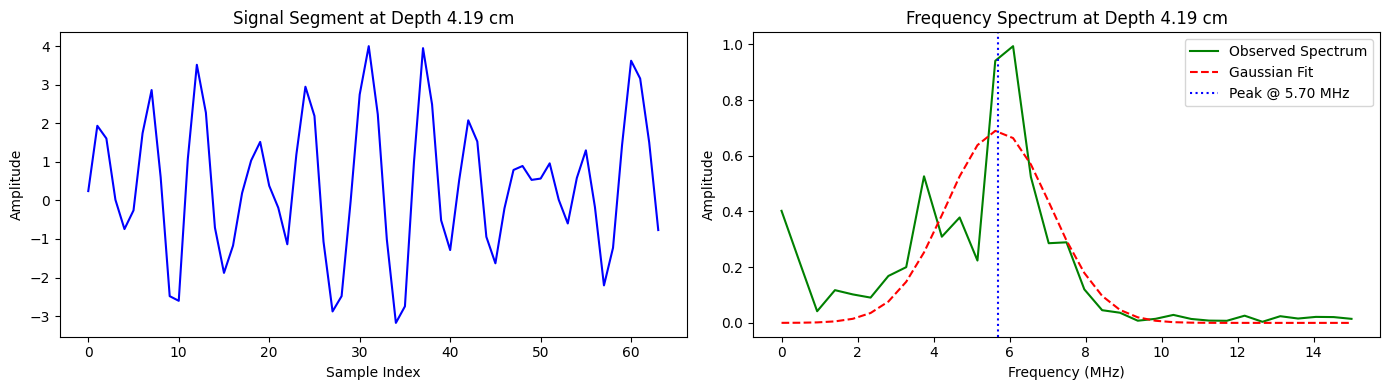

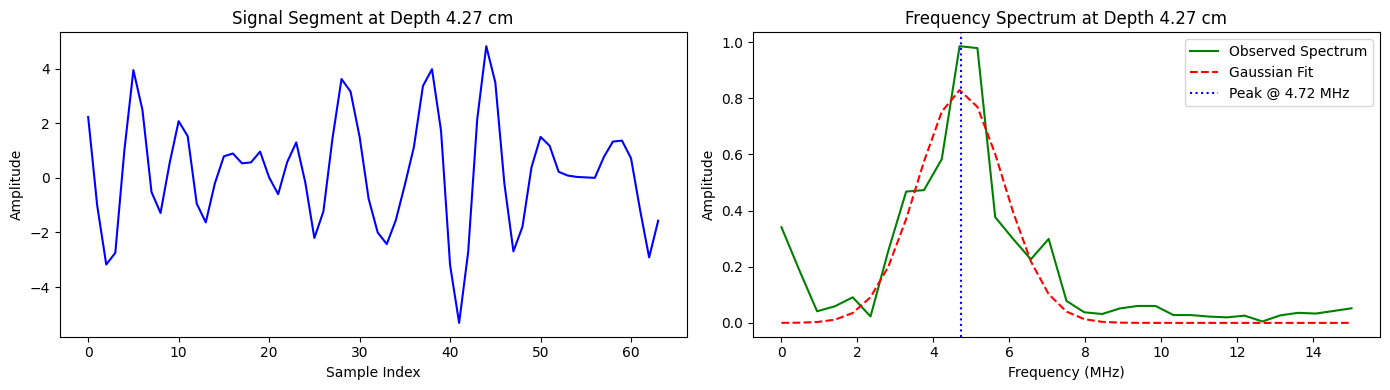

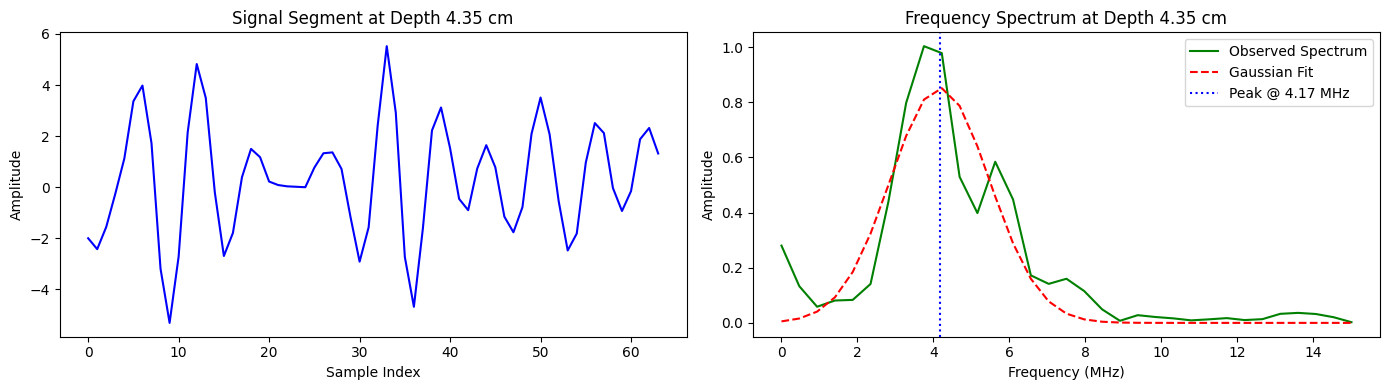

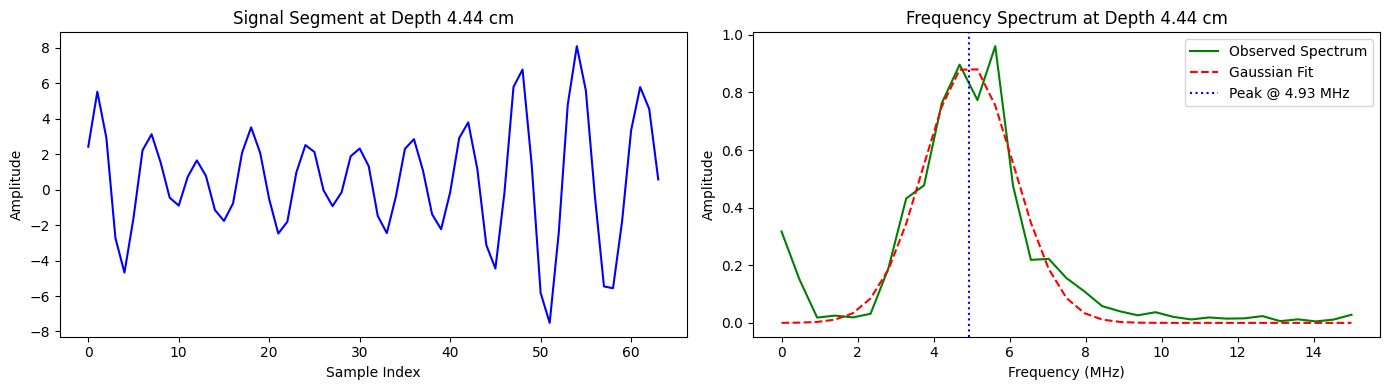

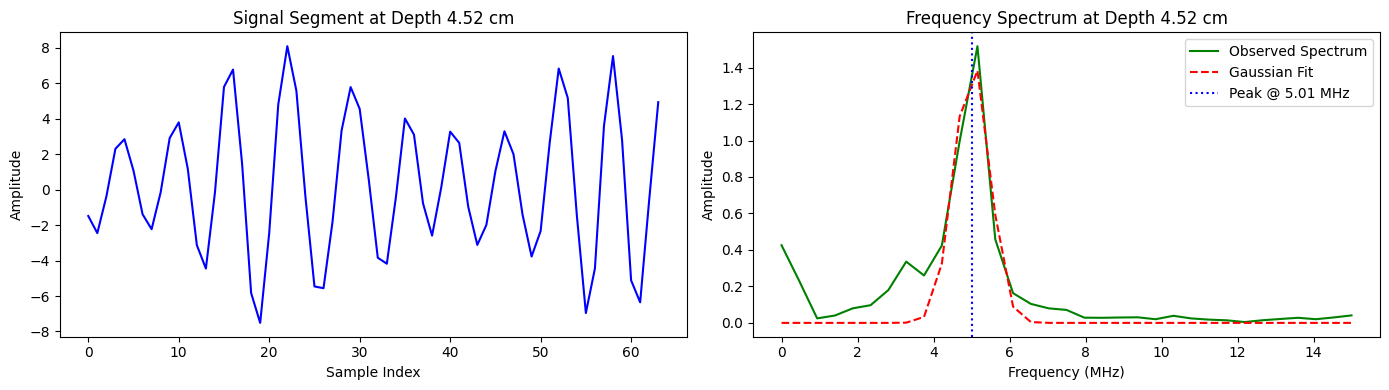

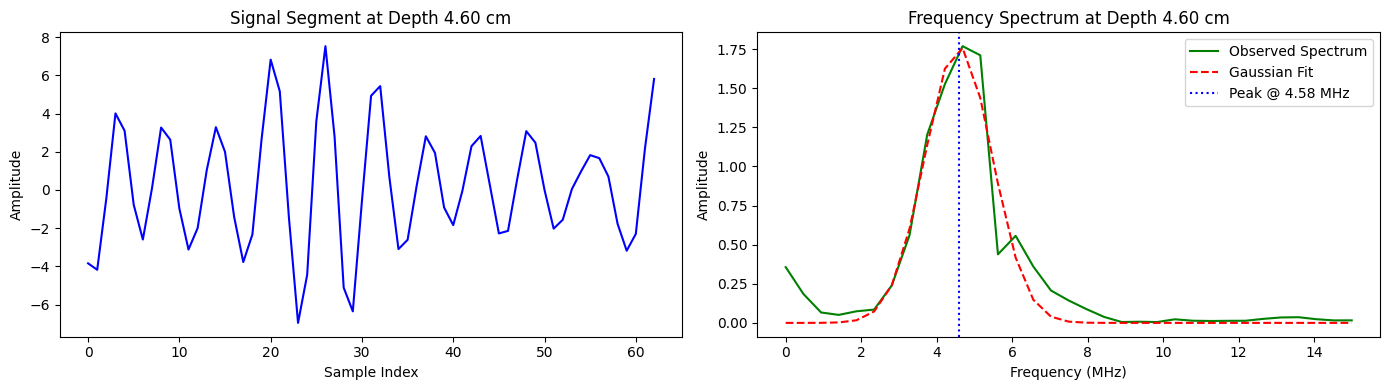

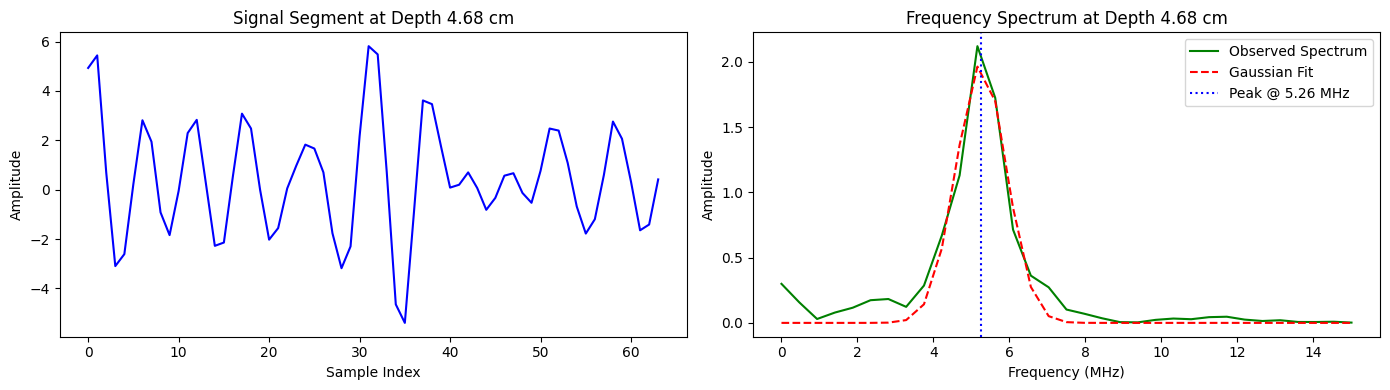

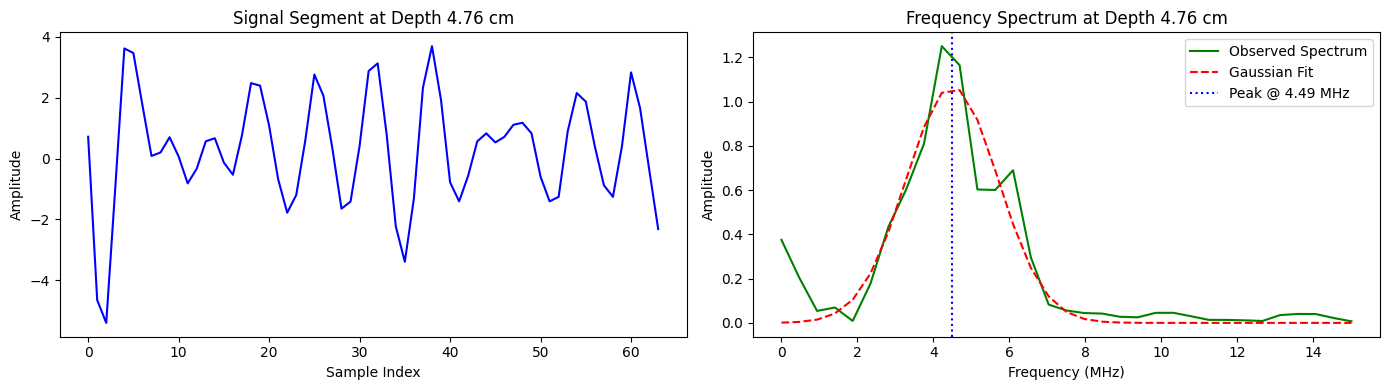

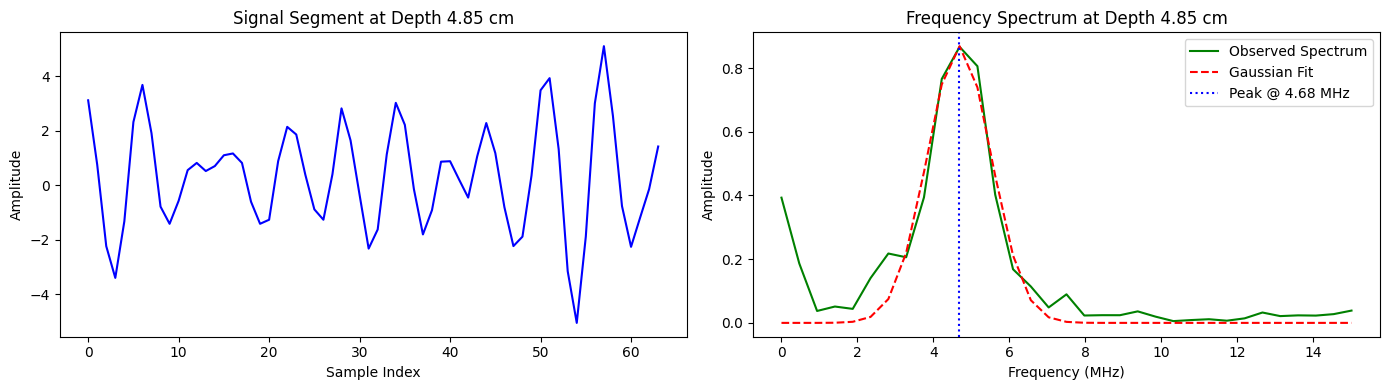

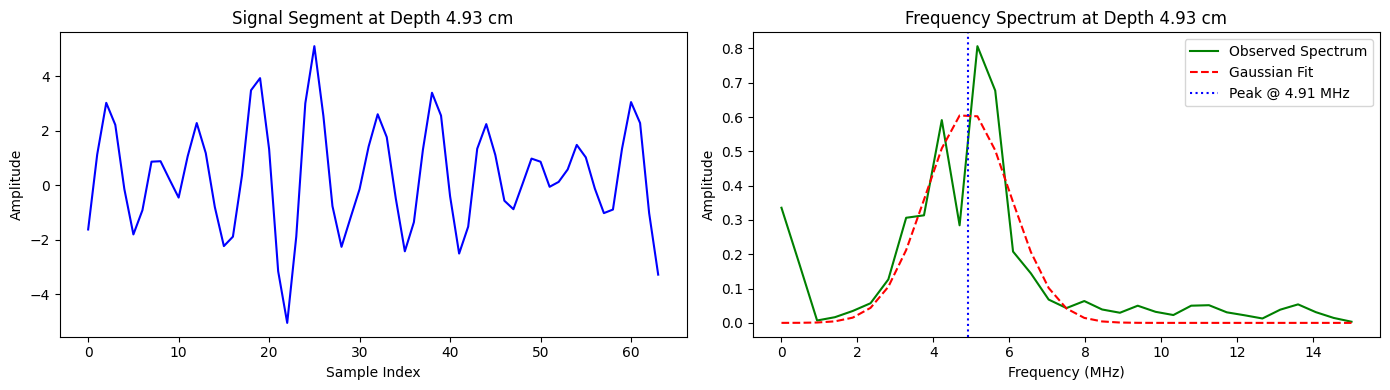

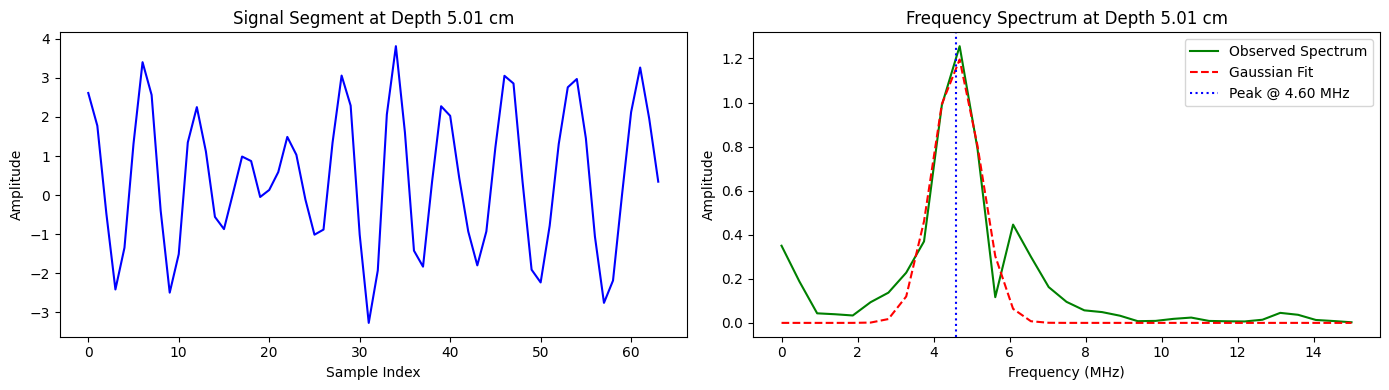

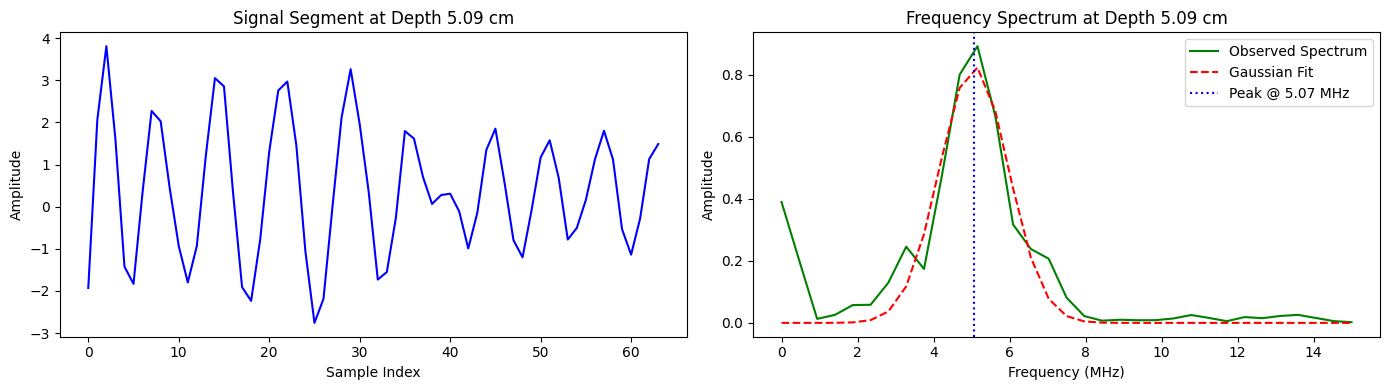

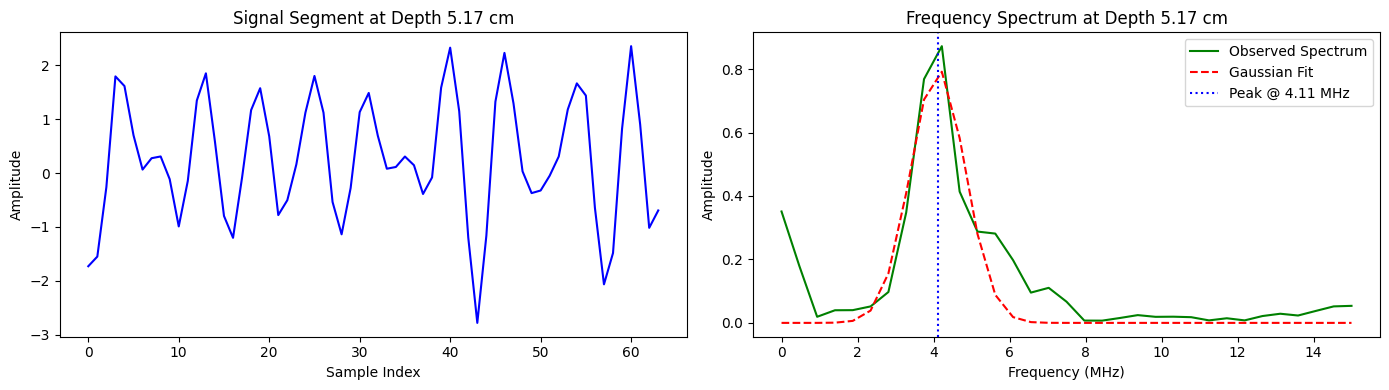

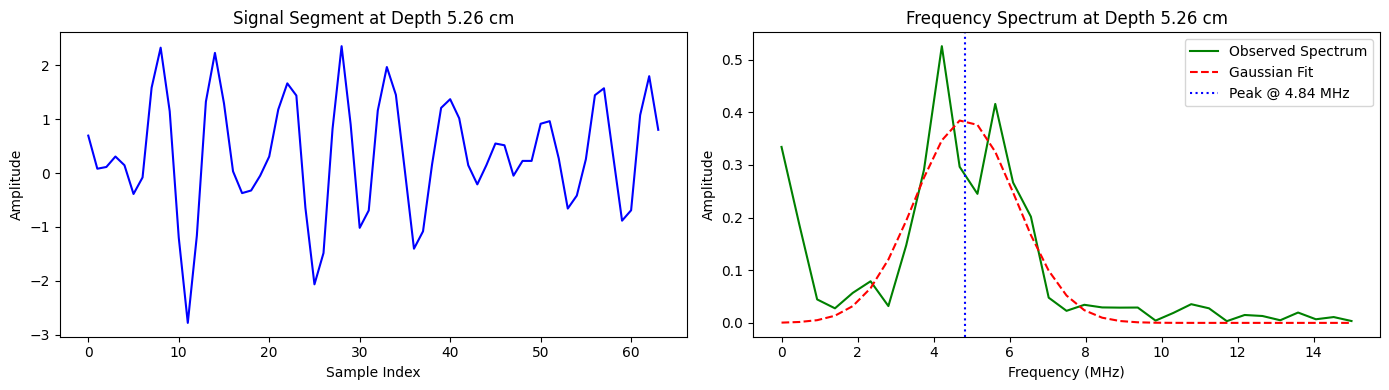

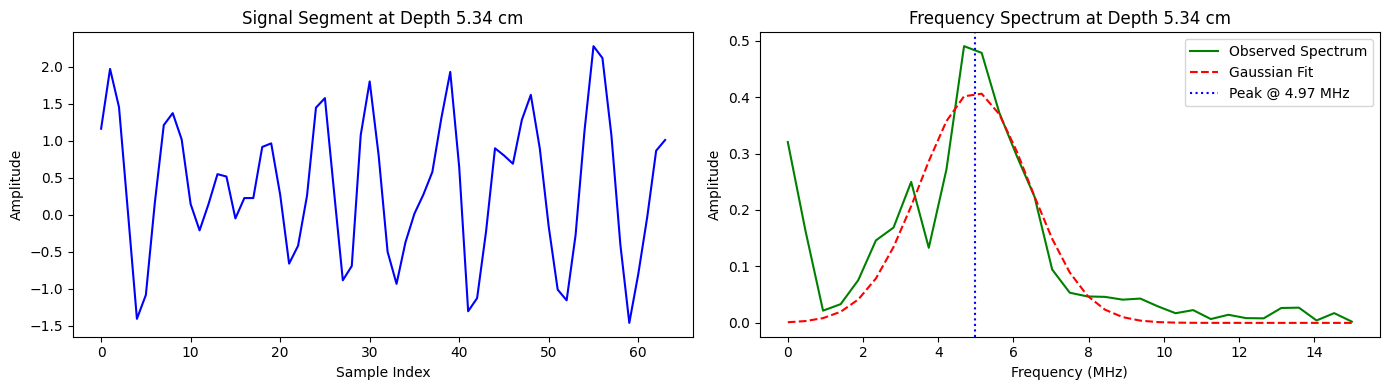

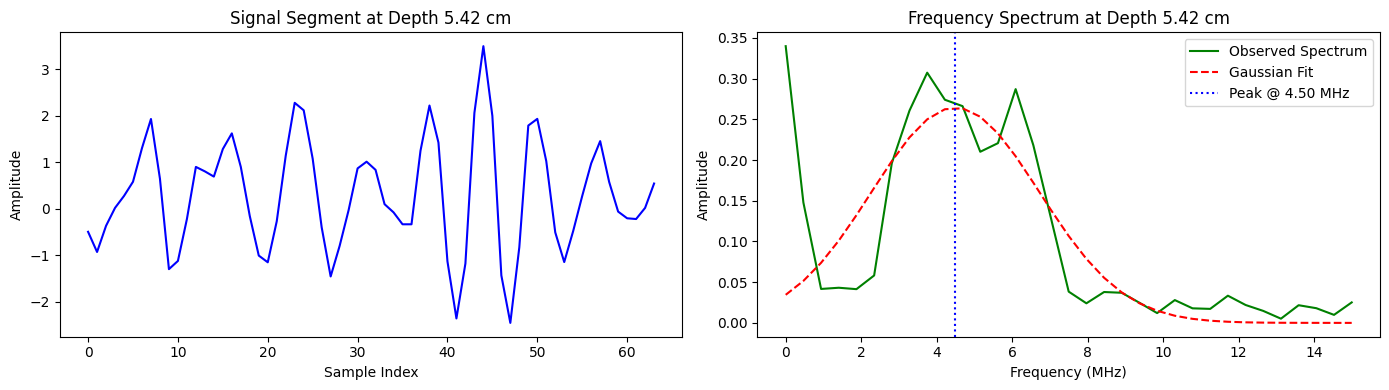

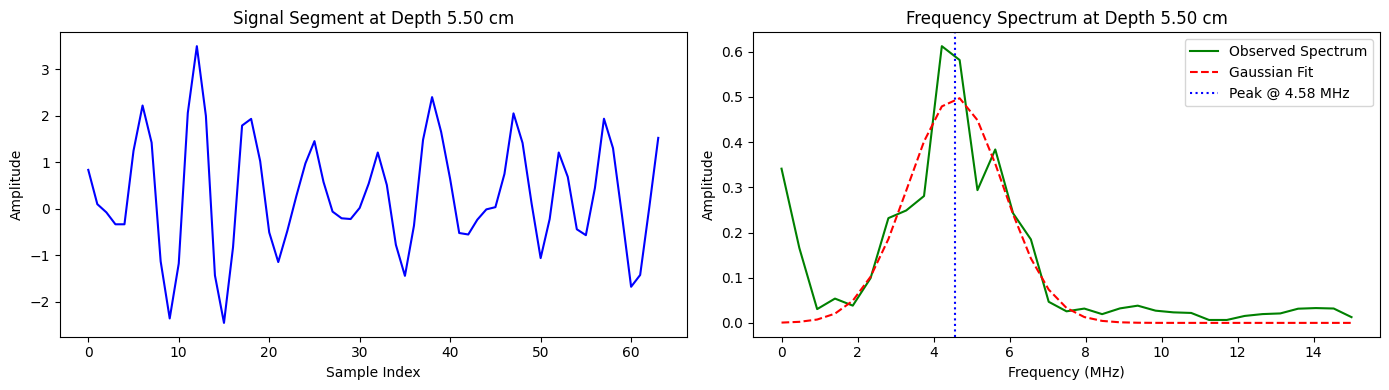

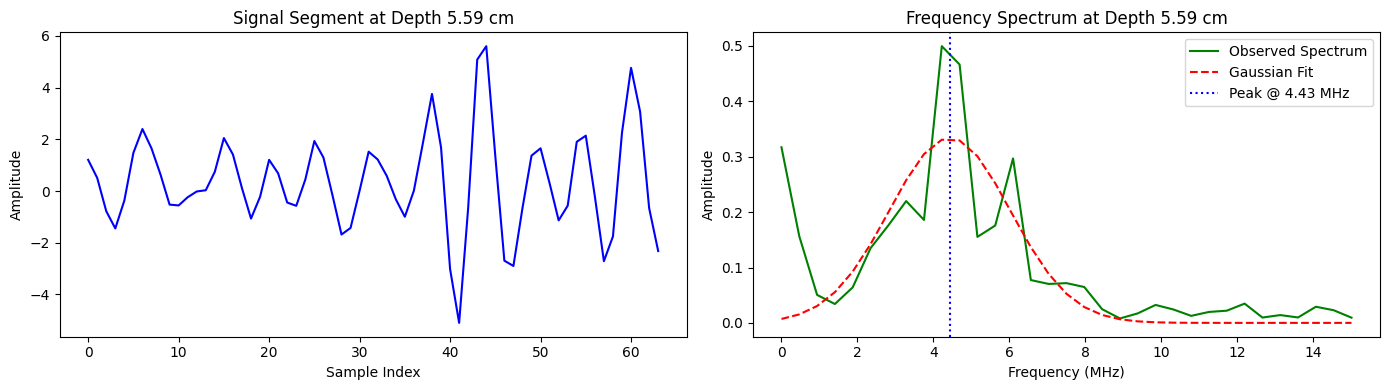

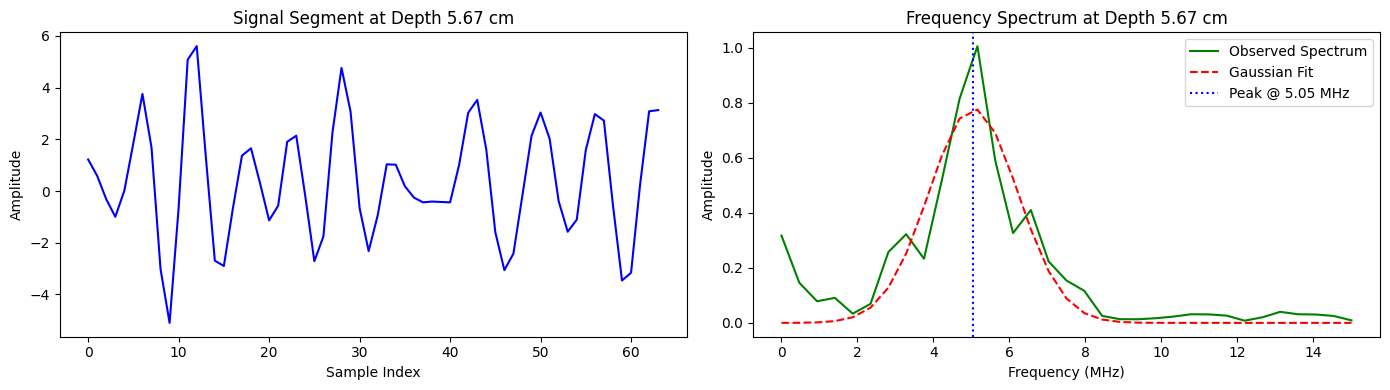

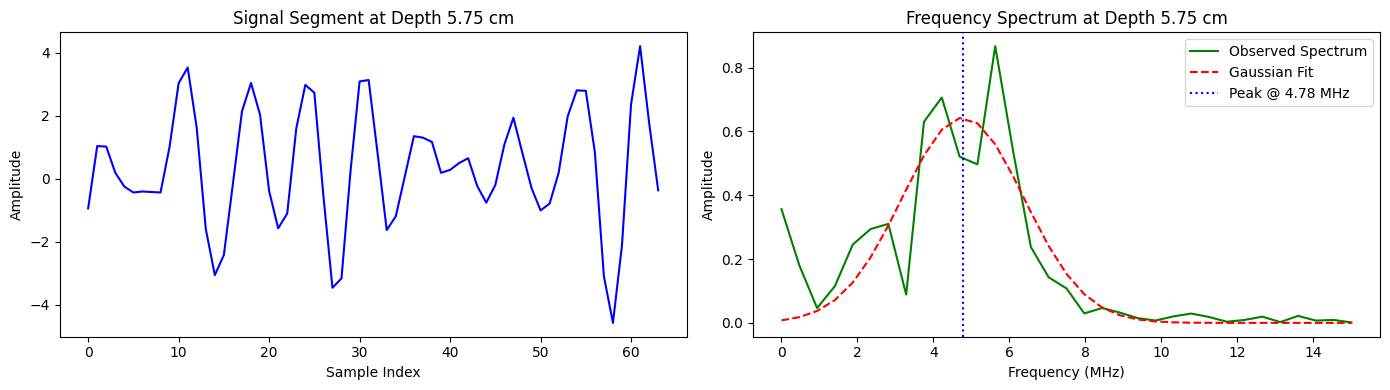

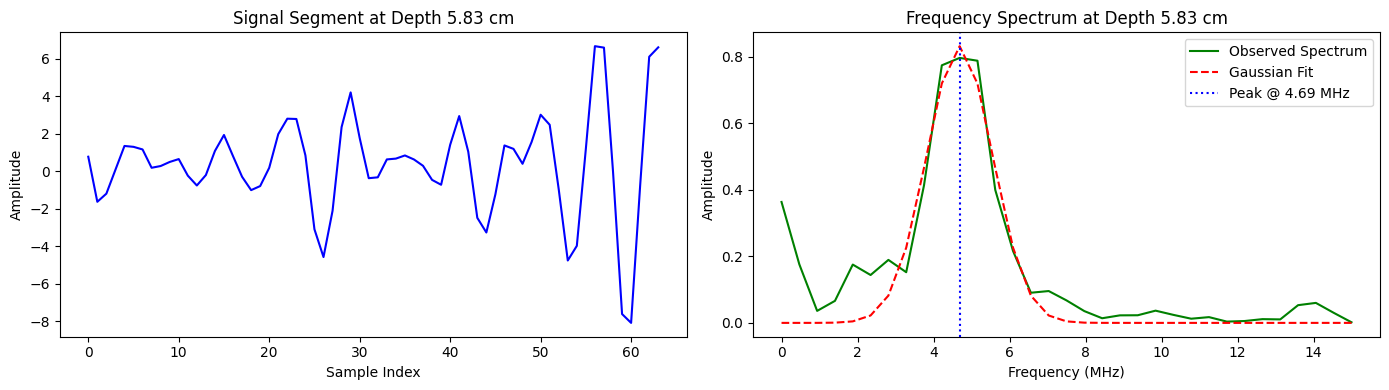

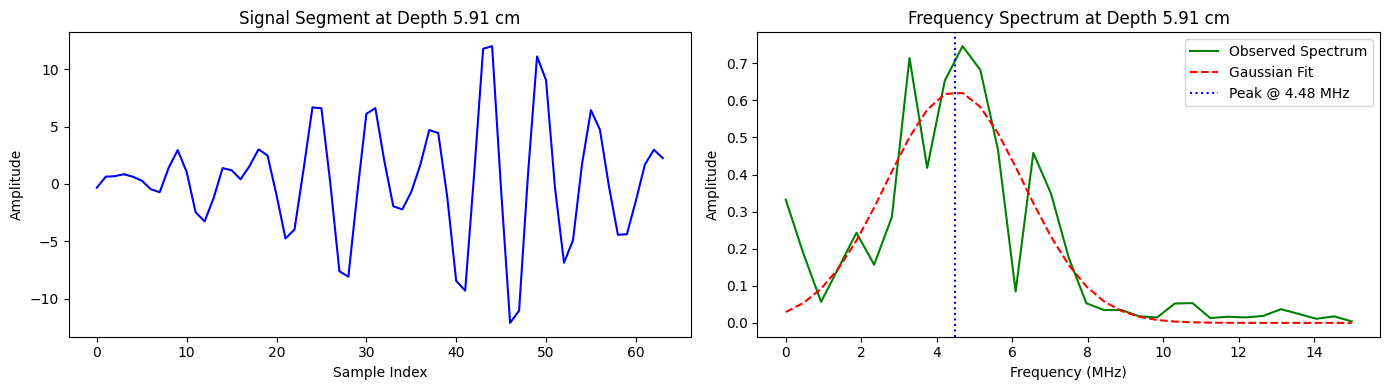

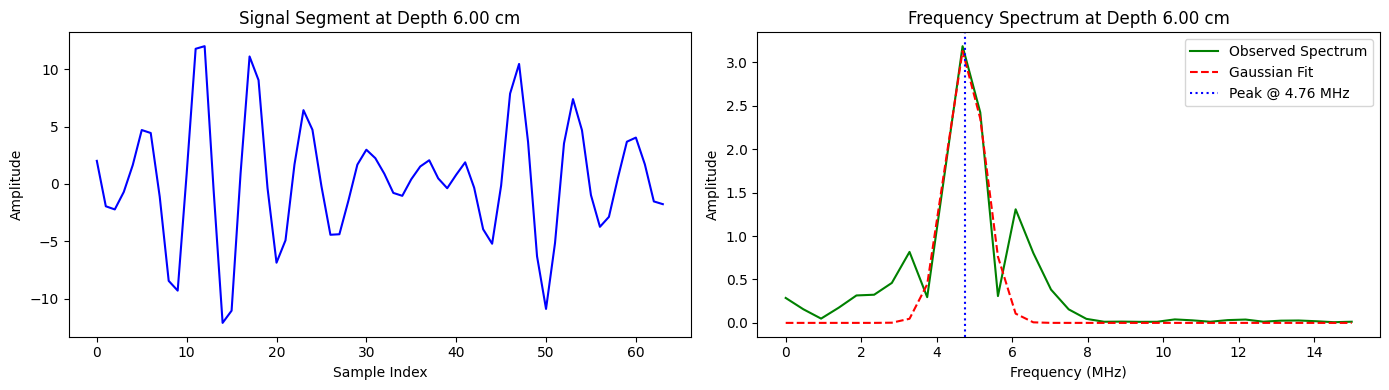

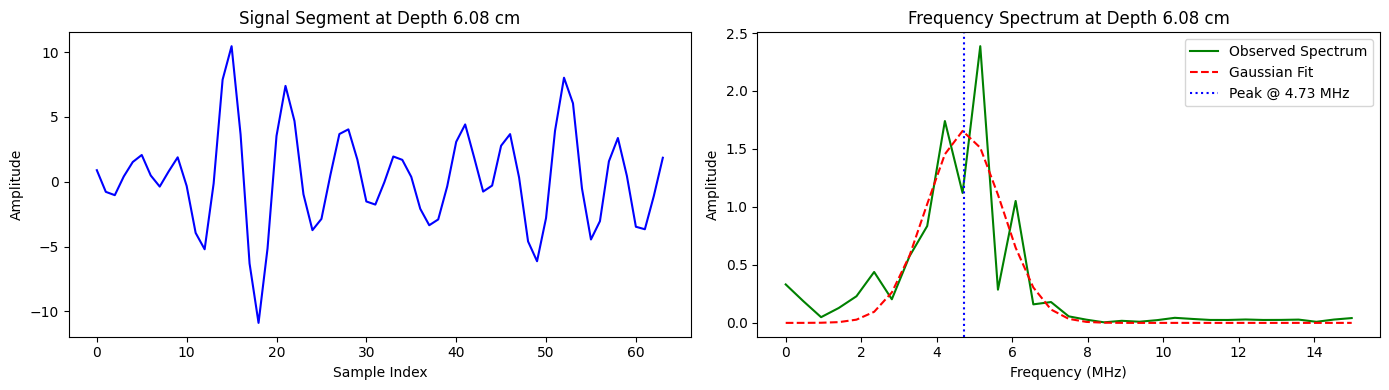

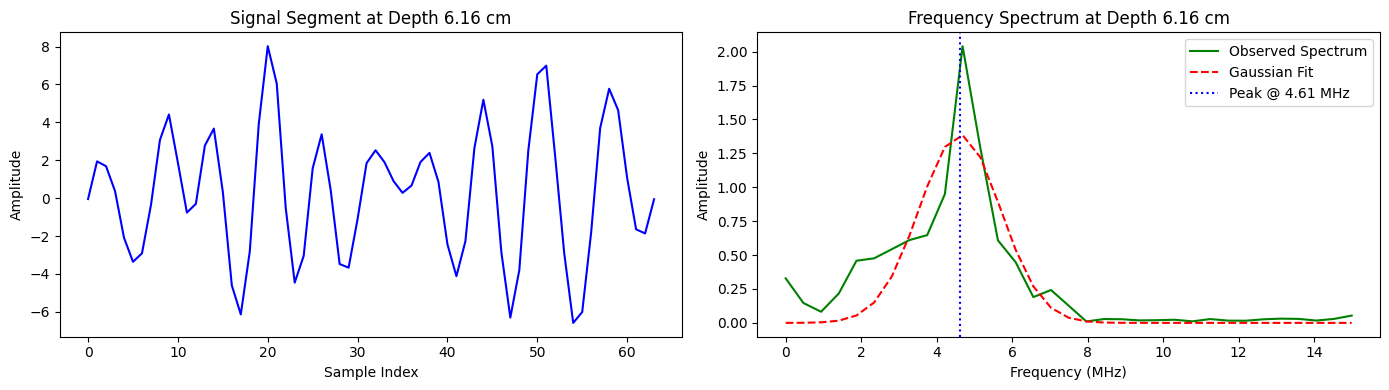

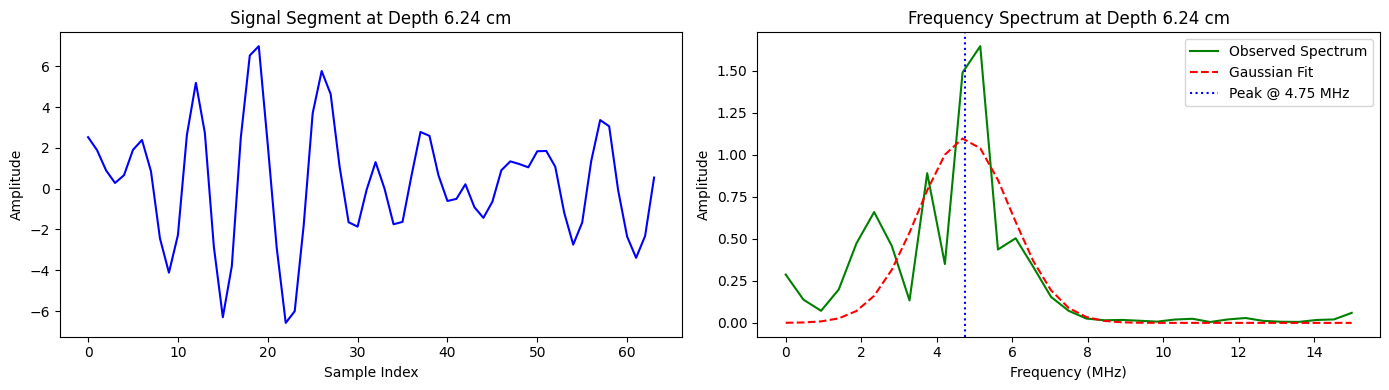

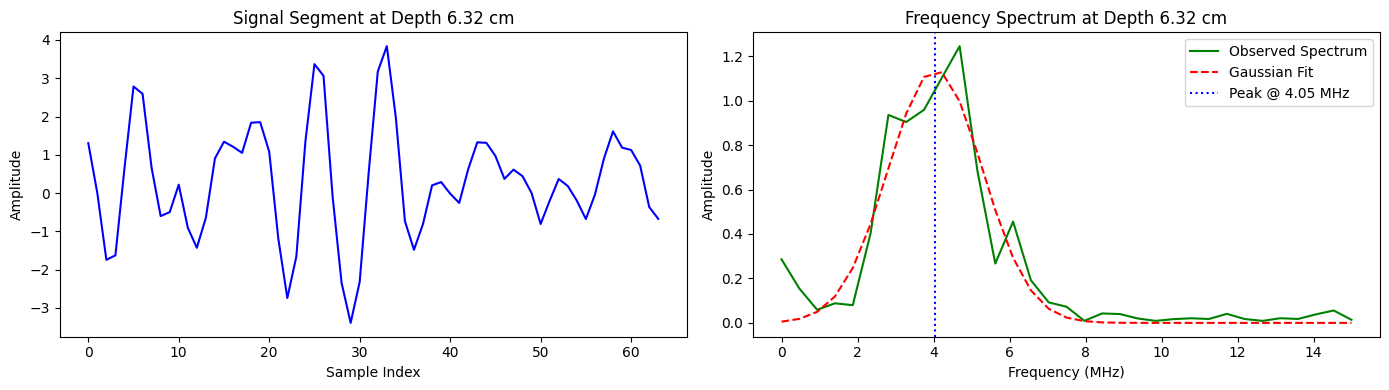

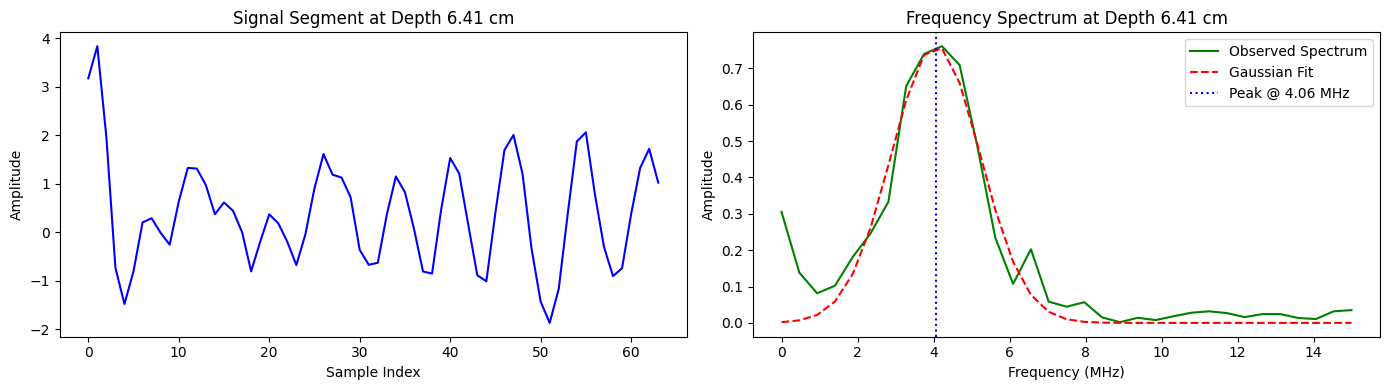

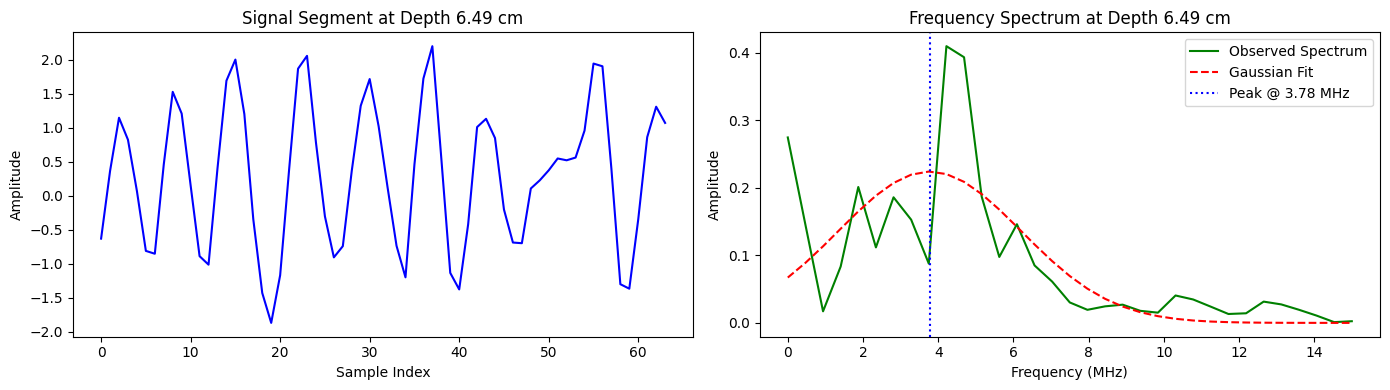

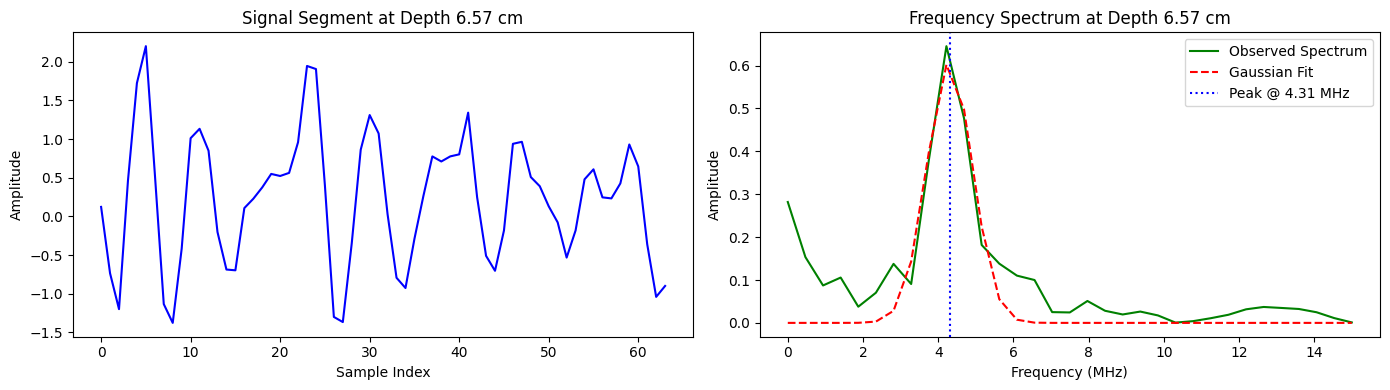

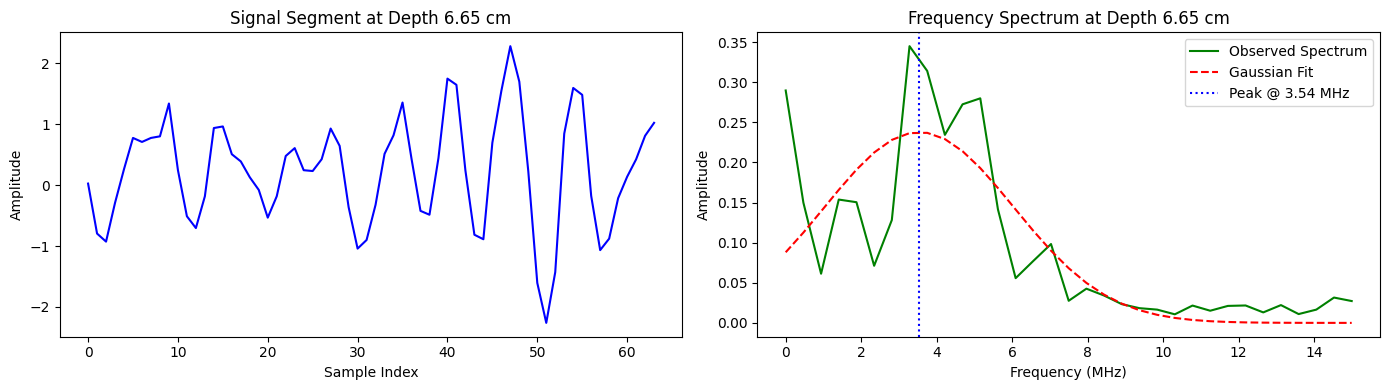

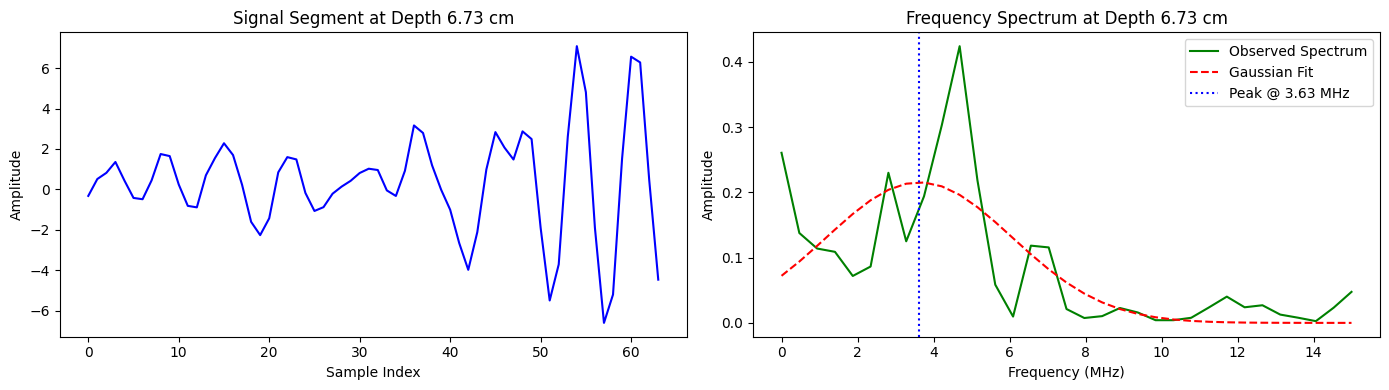

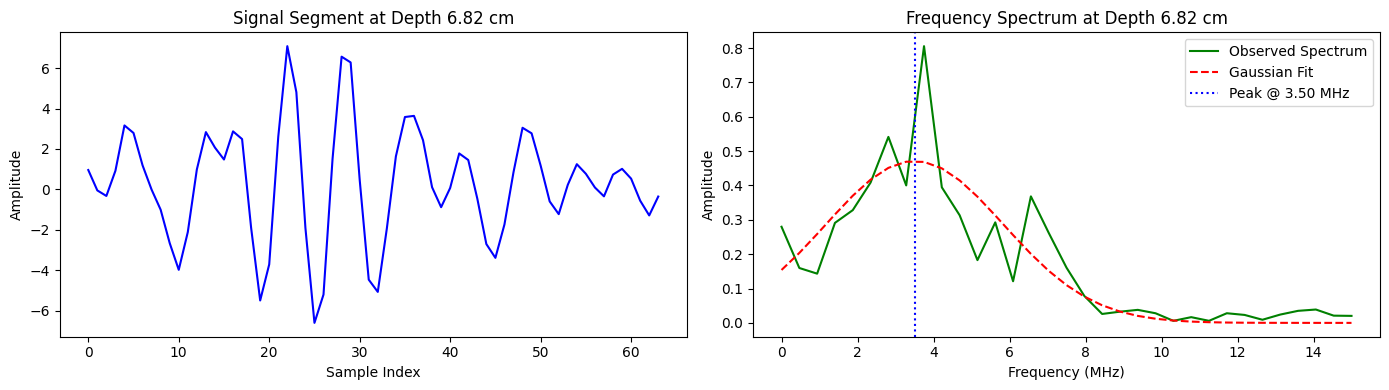

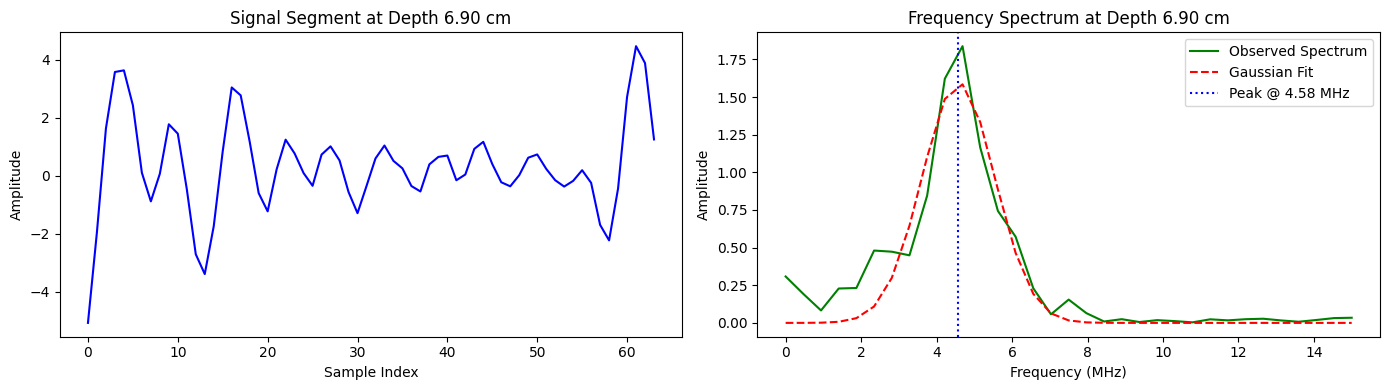

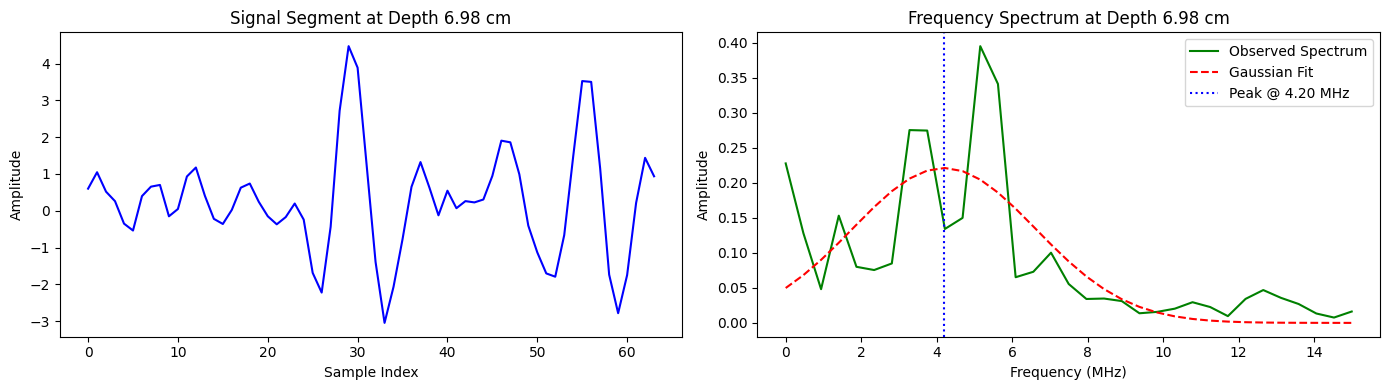

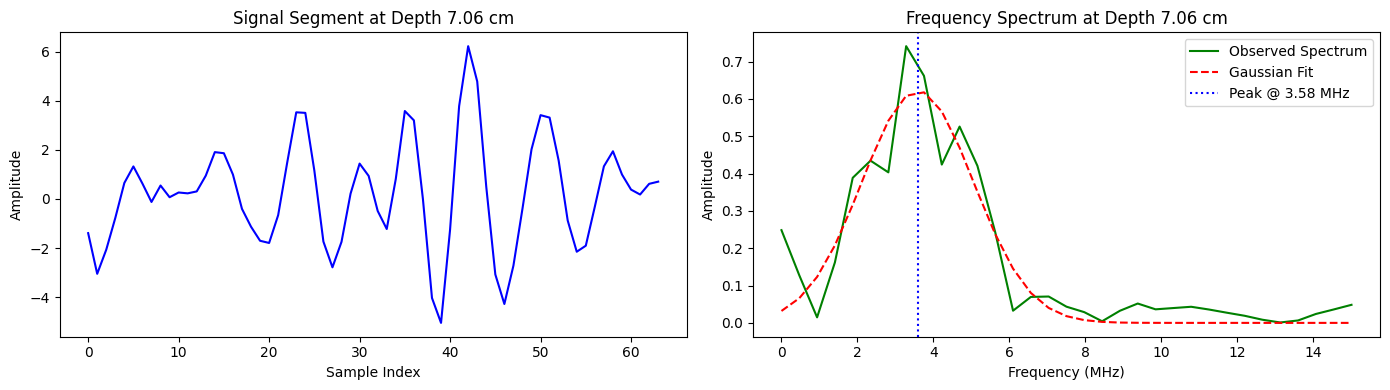

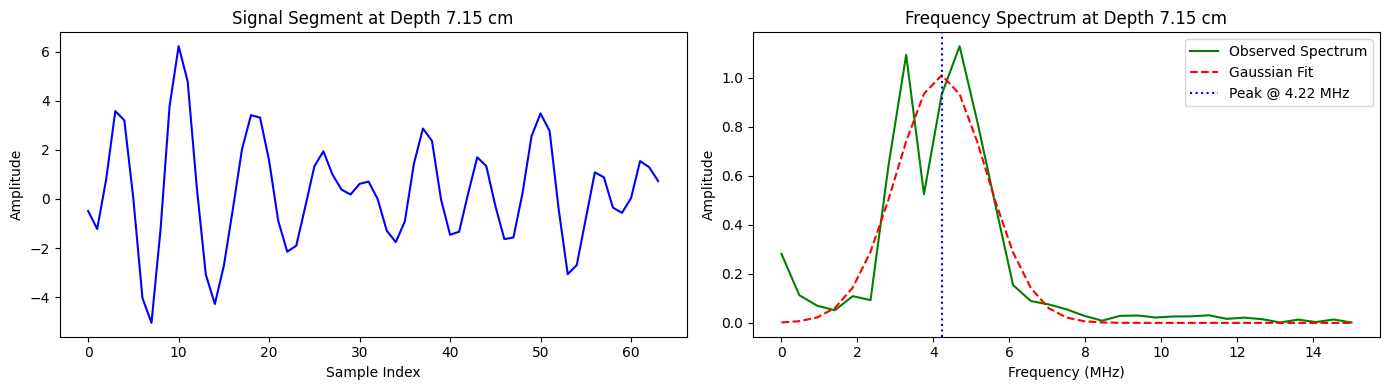

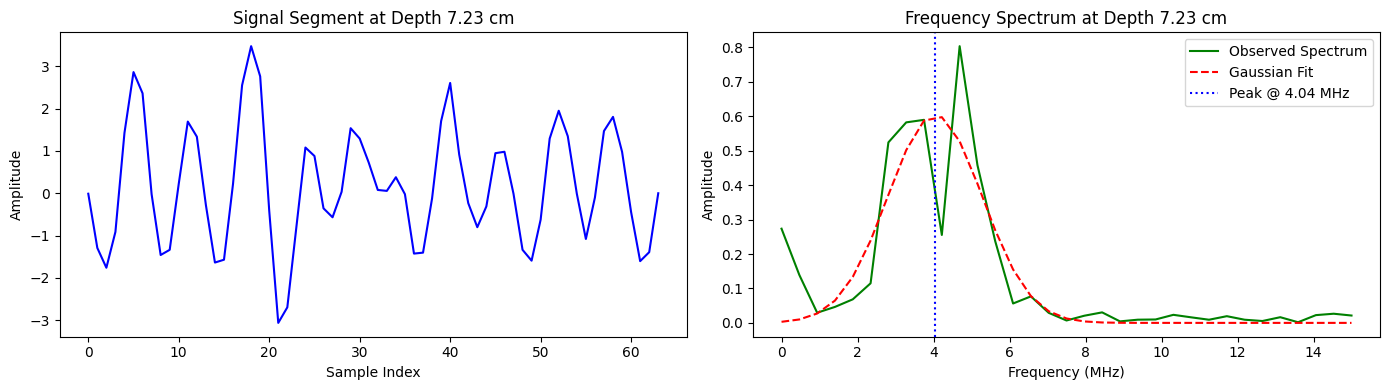

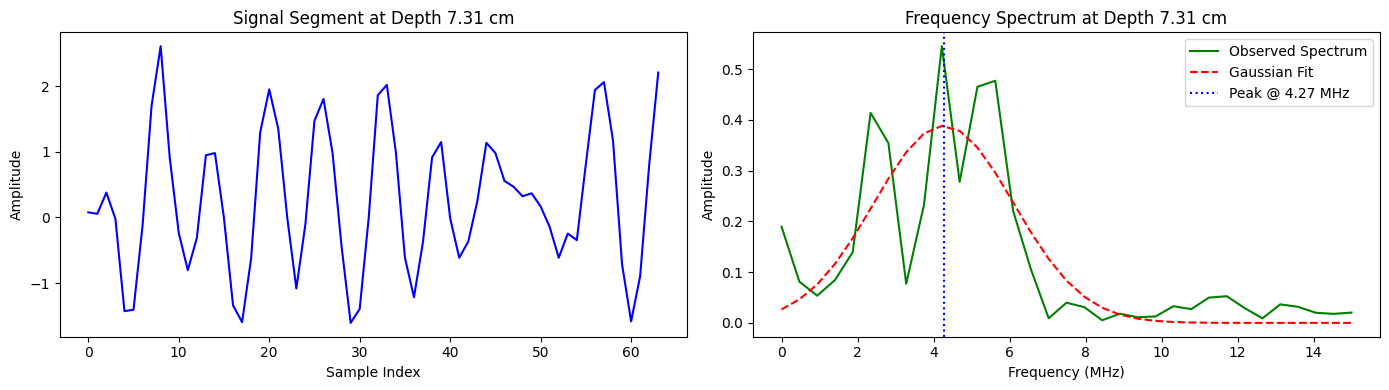

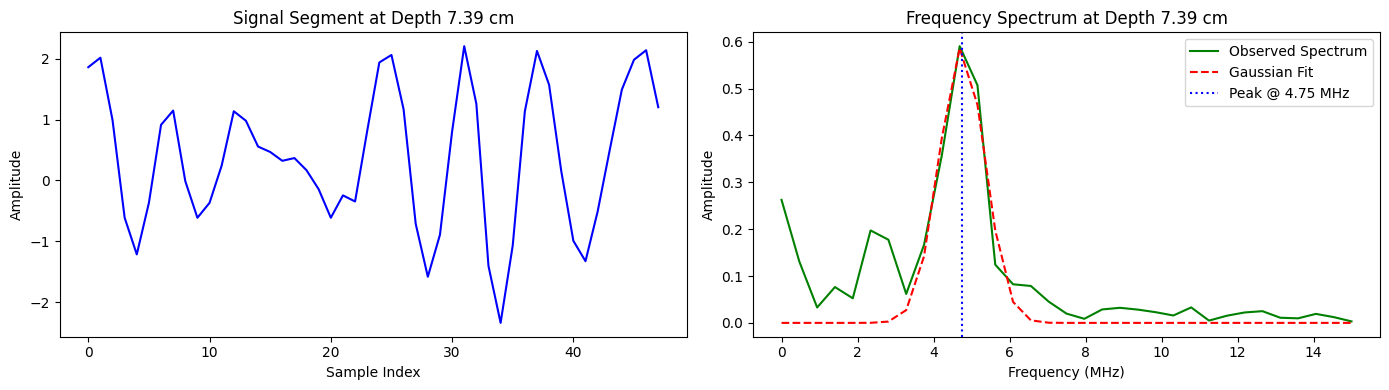

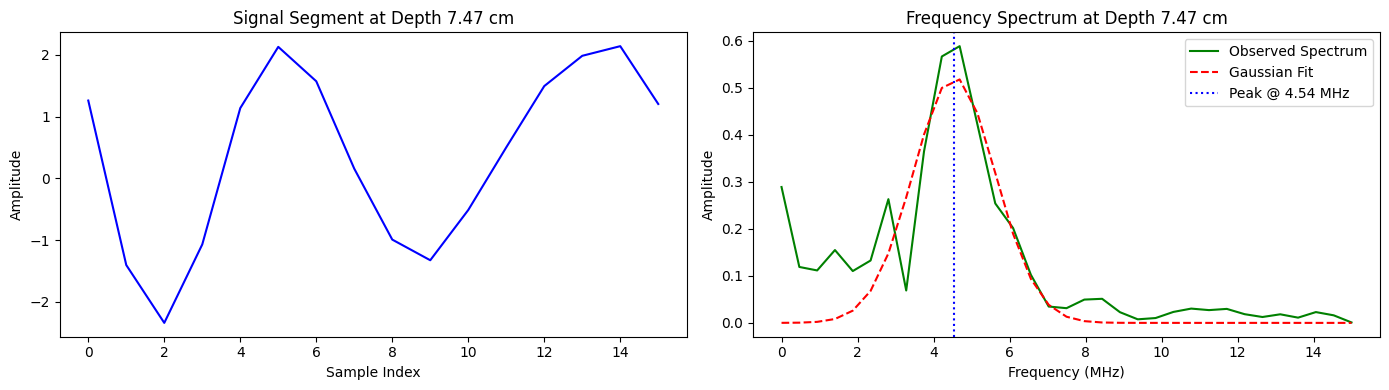

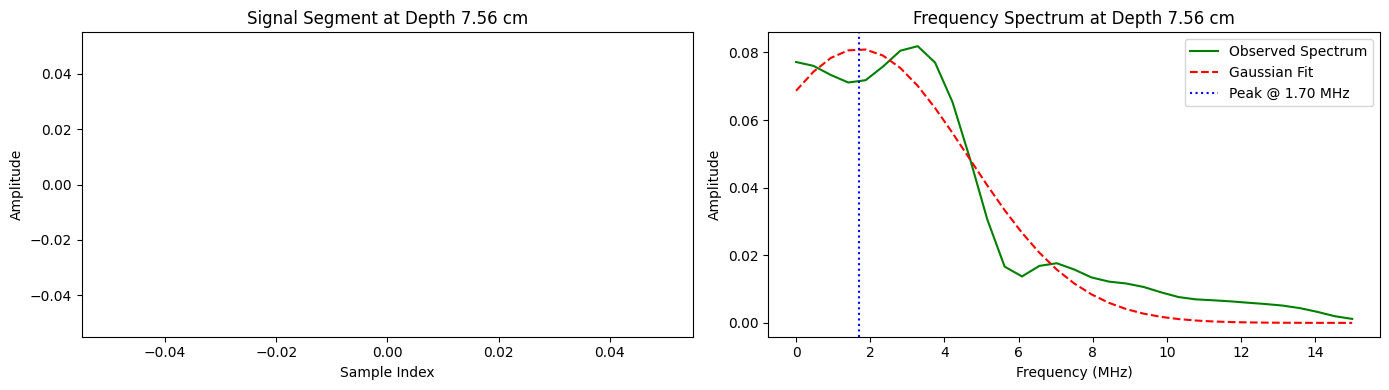

2025-06-06 13:16:21,619 - INFO - Attenuation coefficient estimation complete. Estimated alpha: 1.1705 dB/cm/MHz


In [5]:
from pyquantus.utc.plugins.attenuation_estimation import AttenuationCoefficientEstimationCFS

fs = 30e6
time_array = depth_time_obj.time_array_s

obj = AttenuationCoefficientEstimationCFS(signal_1d, fs, time_array, visualize=True, speed_of_sound=1540, nperseg=64, overlap=32)
